In [ ]:
import pandas as pd
import warnings
import numpy as np
import matplotlib.pyplot as plt
import _pickle as cPickle
import _pickle as pickle
import seaborn as sns
from sklearn.model_selection import train_test_split
from collections import Counter
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.calibration import CalibratedClassifierCV
from sklearn.metrics.classification import accuracy_score, log_loss
from sklearn.metrics import log_loss
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score

from sklearn.model_selection import GridSearchCV
from scipy.stats import randint as sp_randint
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import SGDClassifier,LogisticRegression
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics.classification import accuracy_score, log_loss
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.decomposition import PCA
from imblearn.over_sampling import SMOTE
import copy
import re
warnings.filterwarnings('ignore')


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported f

In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.layers import Conv1D,MaxPool1D,Input,Dense,Flatten,Embedding,Concatenate,LSTM,Dropout,BatchNormalization,MaxPooling2D,LeakyReLU,concatenate,SpatialDropout1D
from tensorflow.keras.metrics import Accuracy,AUC
from tensorflow.keras import Model
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer
from sklearn.metrics import roc_auc_score,roc_curve,auc,f1_score
from tensorflow.keras.callbacks import Callback,ModelCheckpoint,EarlyStopping,LearningRateScheduler,TensorBoard
from tensorflow.keras.backend import backend
import tensorflow.keras.backend as k
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.compat.v1.keras.layers import CuDNNLSTM
from tensorflow.keras.regularizers import l2

In [ ]:
np.random.choice(31,size=(40))

array([15, 11, 11,  5,  3, 16, 15, 16, 25,  3, 12, 30, 25, 29, 24, 21,  3,
        4, 17, 20, 11, 27,  7,  7, 12, 25, 26, 10,  8,  5, 30, 15, 14,  4,
        3, 23, 26, 28, 27,  8])

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
file = open("/content/drive/MyDrive/Final_Remove_outlier.pickle",'rb')
df_final = pickle.load(file)
file.close()



In [ ]:
dfdata=copy.deepcopy(df_final)

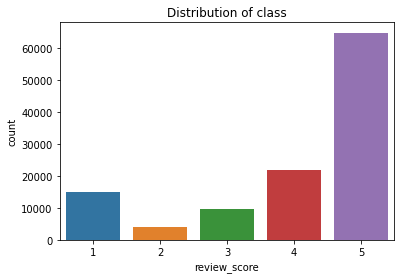

In [ ]:
sns.countplot(x='review_score',data=df_final)
plt.title("Distribution of class")
plt.show()

<b>Observation</b>
1. We can see that it is imbalanced data 
2. Required some technique for balanced

In [ ]:
df_final.drop(columns='zip_code_prefix_seller',inplace=True,axis=1)
# plt.figure(figsize=(8,5))
# sns.barplot(x='review_score',y='payment_sequential',data=df_final, palette='rainbow')
# plt.title("Fare of Passenger by Embarked Town")

## product_category_name and product_category_name_english is similar because it is a translated data  

In [ ]:
df_final.loc[:,['product_category_name','product_category_name_english']] #product_category_name


,product_category_name,product_category_name_english
0,moveis_escritorio,office_furniture
1,moveis_escritorio,office_furniture
2,moveis_escritorio,office_furniture
3,moveis_escritorio,office_furniture
4,moveis_escritorio,office_furniture
...,...,...
116576,la_cuisine,la_cuisine
116577,la_cuisine,la_cuisine
116578,la_cuisine,la_cuisine
116579,la_cuisine,la_cuisine


In [ ]:
df_final.drop(columns='product_category_name',axis=1 ,inplace=True)

<b>Observation</b>

1. Drop the one coloumn because product_category_name its translated in english verified from Google

## Check Model Performance without Class Balanced

In [ ]:
file = open("/content/drive/MyDrive/X_Train_updated1.pickle",'rb')
X_train = pickle.load(file)
file.close()

file = open("/content/drive/MyDrive/X_TEST_updated1.pickle",'rb')
X_test = pickle.load(file)
file.close()

file = open("/content/drive/MyDrive/Y_Train_updated1.pickle",'rb')
y_train = pickle.load(file)
file.close()

file = open("/content/drive/MyDrive/Y_Test_updated1.pickle",'rb')
y_test = pickle.load(file)
file.close()

In [ ]:
# #https://machinelearningmastery.com/train-test-split-for-evaluating-machine-learning-algorithms/
# X=df_final.drop(columns='review_score')
# y=df_final['review_score']
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=10, stratify=y)


In [ ]:
print('Train Shape is',X_train.shape,y_train.shape)
print('Test Shape is',X_test.shape,y_test.shape)

Train Shape is (80917, 28) (80917,)
Test Shape is (34680, 28) (34680,)


In [ ]:
# for verify the proportion of class
print(Counter(y_train))
print(Counter(y_test))

Counter({5: 45406, 4: 15304, 1: 10489, 3: 6838, 2: 2880})
Counter({5: 19461, 4: 6559, 1: 4495, 3: 2930, 2: 1235})


In [ ]:
np.unique(X_train.product_category_name_english)

array(['agro_industry_and_commerce', 'air_conditioning', 'art',
       'arts_and_craftmanship', 'audio', 'auto', 'baby', 'bed_bath_table',
       'books_general_interest', 'books_imported', 'books_technical',
       'cds_dvds_musicals', 'christmas_supplies', 'cine_photo',
       'computers', 'computers_accessories', 'consoles_games',
       'construction_tools_construction', 'construction_tools_lights',
       'construction_tools_safety', 'cool_stuff',
       'costruction_tools_garden', 'costruction_tools_tools',
       'diapers_and_hygiene', 'drinks', 'dvds_blu_ray', 'electronics',
       'fashio_female_clothing', 'fashion_bags_accessories',
       'fashion_childrens_clothes', 'fashion_male_clothing',
       'fashion_shoes', 'fashion_sport', 'fashion_underwear_beach',
       'fixed_telephony', 'flowers', 'food', 'food_drink',
       'furniture_bedroom', 'furniture_decor', 'furniture_living_room',
       'furniture_mattress_and_upholstery', 'garden_tools',
       'health_beauty', 'home

## Responce coding for categorical variable 

In [ ]:
def response_coding(xtrain, ytrain, feature):        
    
    dictionary = dict()
    x = PrettyTable()
    x = PrettyTable([feature, 'class 5', 'class 4','class 3','class 2','class 1'])

    unique_cat_labels = xtrain[feature].unique()

    for i in (range(len(unique_cat_labels))):
        total_count = xtrain.loc[:,feature][(xtrain[feature] == unique_cat_labels[i])].count()
        #p_0 = xtrain.loc[:, feature][((xtrain[feature] == unique_cat_labels[i]) & (ytrain==0))].count()
        #p_1 = xtrain.loc[:, feature][((xtrain[feature] == unique_cat_labels[i]) & (ytrain==1))].count()
        p_5 = xtrain.loc[:, feature][((xtrain[feature] == unique_cat_labels[i]) & (ytrain==5))].count()
        p_4 = xtrain.loc[:, feature][((xtrain[feature] == unique_cat_labels[i]) & (ytrain==4))].count()
        p_3 = xtrain.loc[:, feature][((xtrain[feature] == unique_cat_labels[i]) & (ytrain==3))].count()
        p_2 = xtrain.loc[:, feature][((xtrain[feature] == unique_cat_labels[i]) & (ytrain==2))].count()
        p_1 = xtrain.loc[:, feature][((xtrain[feature] == unique_cat_labels[i]) & (ytrain==1))].count()
        

        dictionary[unique_cat_labels[i]] = [p_5/total_count, p_4/total_count,p_3/total_count,p_2/total_count,p_1/total_count]

        row = []
        row.append(unique_cat_labels[i])
        row.append(p_5/total_count)
        row.append(p_4/total_count)
        row.append(p_3/total_count)
        row.append(p_2/total_count)
        row.append(p_1/total_count)
        
        x.add_row(row)
    print()
    print(x)#[![enter image description here][1]][1]
    return dictionary

## Categorical Variable Response Coding

In [ ]:
X_train.select_dtypes(include='object').columns
#X_train.columns

Index(['customer_state', 'order_status', 'payment_type', 'seller_city',
       'seller_state', 'product_category_name_english',
       'Month_Year_Purchase_Order', 'Month_year_order_deliverd'],
      dtype='object')

In [ ]:
def RemoveChar(data,feature):
    special_char = "@_!#$%^&''*()<>?/\|}{~:;[]"
    for i in special_char:
        data[feature]=data[feature].str.replace(i, " ").replace(" ","_")
        data[feature]=data[feature].str.replace("  "," ")    
        data[feature]=data[feature].str.replace(" ","_")
    return np.unique(data[feature])    
        

In [ ]:
RemoveChar(X_train,'seller_city')

array(['04482255', 'afonso_claudio', 'alambari', 'alfenas',
       'almirante_tamandare', 'alvares_machado', 'alvorada', 'americana',
       'amparo', 'ampere', 'anapolis', 'andira-pr', 'andradas',
       'angra_dos_reis', 'angra_dos_reis_rj', 'ao_bernardo_do_campo',
       'aparecida', 'aparecida_de_goiania', 'aperibe', 'apucarana',
       'aracaju', 'aracatuba', 'araguari', 'arapongas', 'ararangua',
       'araraquara', 'araras', 'araucaria', 'araxa', 'arinos',
       'armacao_dos_buzios', 'arraial_d_ajuda__porto_seguro_',
       'artur_nogueira', 'aruja', 'arvorezinha', 'assis', 'atibaia',
       'auriflama', 'auriflama_sp', 'avare', 'bady_bassitt', 'baependi',
       'bage', 'bahia', 'balenario_camboriu', 'balneario_camboriu',
       'bandeirantes', 'bariri', 'barra_mansa', 'barra_velha', 'barretos',
       'barrinha', 'barueri', 'batatais', 'bauru', 'bebedouro',
       'belford_roxo', 'belo_horizont', 'belo_horizonte',
       'bento_goncalves', 'bertioga', 'betim', 'birigui', 'blu

In [ ]:
RemoveChar(X_test,'seller_city')

array(['abadia_de_goias', 'afonso_claudio', 'aguas_claras_df', 'alambari',
       'alfenas', 'alvares_machado', 'alvorada', 'americana', 'amparo',
       'ampere', 'anapolis', 'andira-pr', 'andradas', 'angra_dos_reis',
       'ao_bernardo_do_campo', 'aparecida', 'aparecida_de_goiania',
       'aperibe', 'apucarana', 'aracaju', 'aracatuba', 'araguari',
       'arapongas', 'ararangua', 'araraquara', 'araras', 'araucaria',
       'araxa', 'armacao_dos_buzios', 'arraial_d_ajuda__porto_seguro_',
       'artur_nogueira', 'aruja', 'arvorezinha', 'assis', 'atibaia',
       'auriflama', 'auriflama_sp', 'bady_bassitt', 'baependi', 'bahia',
       'balenario_camboriu', 'balneario_camboriu', 'barbacena',
       'barbacena__minas_gerais', 'bariri', 'barra_mansa', 'barretos',
       'barro_alto', 'barueri', 'batatais', 'bauru', 'bebedouro',
       'belo_horizonte', 'bento_goncalves', 'bertioga', 'betim',
       'birigui', 'blumenau', 'bocaiuva_do_sul', 'bofete', 'boituva',
       'bom_jardim', 'bomb

In [ ]:
np.unique(X_train.Month_year_order_deliverd)

array(['10_2016', '10_2017', '10_2018', '11_2016', '11_2017', '12_2016',
       '12_2017', '1_2017', '1_2018', '2_2017', '2_2018', '3_2017',
       '3_2018', '4_2017', '4_2018', '5_2017', '5_2018', '6_2017',
       '6_2018', '7_2017', '7_2018', '8_2017', '8_2018', '9_2017',
       '9_2018'], dtype=object)

In [ ]:
#!pip install prettytable
from prettytable import PrettyTable
customer_state_dict=response_coding(X_train,y_train,'customer_state')
order_status_dict=response_coding(X_train,y_train,'order_status')
payment_type_dict=response_coding(X_train,y_train,'payment_type')
seller_city_dict=response_coding(X_train,y_train,'seller_city')
seller_state_dict=response_coding(X_train,y_train,'seller_state')
product_category_name_english_dict=response_coding(X_train,y_train,'product_category_name_english')
Month_Year_Purchase_Order_dict=response_coding(X_train,y_train,'Month_Year_Purchase_Order')
Month_year_order_deliverd_dict=response_coding(X_train,y_train,'Month_year_order_deliverd')

#X_train['customer_state '][X_train]
# X_train.loc[:, 'customer_state'][((X_train['customer_state'] == 'SP') & (y_train==5))].count()
# X_train.loc[:, 'customer_state'][((X_train['customer_state'] == 'SP'))].count()
#X_train.loc[:, 'customer_state'][((X_train['customer_state'] == 'SP') & (y_train==4))].count()/X_train.loc[:, 'customer_state'][((X_train['customer_state'] == 'SP'))].count()


+----------------+---------------------+---------------------+---------------------+----------------------+---------------------+
| customer_state |       class 5       |       class 4       |       class 3       |       class 2        |       class 1       |
+----------------+---------------------+---------------------+---------------------+----------------------+---------------------+
|       SP       |  0.588928185192763  | 0.18916786017011078 | 0.08113874842895975 | 0.033203752959401395 |  0.1075614532487651 |
|       MG       |  0.5702321636806954 |  0.191985582529418  | 0.08576274780027562 |  0.0313792006784692  | 0.12064030531114174 |
|       PA       | 0.47021546261089986 | 0.21292775665399238 | 0.10646387832699619 | 0.04182509505703422  | 0.16856780735107732 |
|       RS       |  0.5613249776186213 | 0.20031333930170098 | 0.08437779767233662 | 0.032900626678603405 |  0.1210832587287377 |
|       ES       |  0.5293028994447871 | 0.20851326341764342 |  0.0919185687847008 | 0.03

In [ ]:
with open(r"/content/drive/MyDrive/customer_state_dict_response_updated1.pickle", "wb") as output_file1:
    cPickle.dump(customer_state_dict,output_file1)
    
with open(r"/content/drive/MyDrive/order_status_dict_response_updated1.pickle", "wb") as output_file2:
    cPickle.dump(order_status_dict,output_file2)
    
with open(r"/content/drive/MyDrive/payment_type_dict_response_updated1.pickle", "wb") as output_file3:
    cPickle.dump(payment_type_dict,output_file3)
    
with open(r"/content/drive/MyDrive/seller_city_dict_response_updated1.pickle", "wb") as output_file4:
    cPickle.dump(seller_city_dict,output_file4)
    
with open(r"/content/drive/MyDrive/seller_state_dict_response_updated1.pickle", "wb") as output_file5:
    cPickle.dump(seller_state_dict,output_file5)   
    
    
with open(r"/content/drive/MyDrive/product_category_name_english_dict_response_updated1.pickle", "wb") as output_file6:
    cPickle.dump(product_category_name_english_dict,output_file6)    

with open(r"/content/drive/MyDrive/Month_Year_Purchase_Order_dict_response_updated1.pickle", "wb") as output_file7:
    cPickle.dump(Month_Year_Purchase_Order_dict,output_file7) 

with open(r"/content/drive/MyDrive/Month_year_order_deliverd_dict_response_updated1.pickle", "wb") as output_file8:
    cPickle.dump(Month_year_order_deliverd_dict,output_file8)     

In [ ]:
def Test_Response(data,feature,Train_dict):
    x = PrettyTable()
    x = PrettyTable([feature, 'class 5', 'class 4','class 3','class 2','class 1'])
    val=list(np.unique(data[feature]))
    train_dict_keys=list(Train_dict.keys())
    test_dict=dict()
    for i in range(len(val)):
        if(val[i] in train_dict_keys):
            test_dict[val[i]]=Train_dict[val[i]]
        else:
            test_dict[val[i]]=[0.25,0.25,0.25,0.25,0.25]
    return test_dict         

In [ ]:
customer_state_dict_test=Test_Response(X_test,'customer_state',customer_state_dict)
order_status_dict_test=Test_Response(X_test,'order_status',order_status_dict)
payment_type_dict_test=Test_Response(X_test,'payment_type',payment_type_dict)
seller_city_dict_test=Test_Response(X_test,'seller_city',seller_city_dict)
seller_state_dict_test=Test_Response(X_test,'seller_state',seller_state_dict)
product_category_name_english_dict_test=Test_Response(X_test,'product_category_name_english',product_category_name_english_dict)
Month_Year_Purchase_Order_dict_test=Test_Response(X_test,'Month_Year_Purchase_Order',Month_Year_Purchase_Order_dict)
Month_year_order_deliverd_dict_test=Test_Response(X_test,'Month_year_order_deliverd',Month_year_order_deliverd_dict)

In [ ]:
#X_train['customer_state'+'_'+'class_5']=np.nan
#customer_state_dict['SP'][0]

In [ ]:
# val_index=X_train[X_train['customer_state']=='SP']['customer_state'].index.to_list()
# X_train.loc[val_index,['customer_state_class_5']]=customer_state_dict['SP'][0]

In [ ]:
def _CreateFeature_ResponseCoding(data,dict_val,feature):
    data[feature+'_'+'class_5']=np.nan
    data[feature+'_'+'class_4']=np.nan
    data[feature+'_'+'class_3']=np.nan
    data[feature+'_'+'class_2']=np.nan
    data[feature+'_'+'class_1']=np.nan
    dict_keys=list(dict_val.keys())
    for i in range(len(dict_keys)):
        val_index=data[data[feature]==dict_keys[i]][feature].index.to_list()
#         print(dict_keys[i])
#         print(dict_val[dict_keys[i]][0])
#         print(dict_val[dict_keys[i]][1])
        
        data.loc[val_index,[feature+'_'+'class_5']]=dict_val[dict_keys[i]][0]
        data.loc[val_index,[feature+'_'+'class_4']]=dict_val[dict_keys[i]][1]
        data.loc[val_index,[feature+'_'+'class_3']]=dict_val[dict_keys[i]][2]
        data.loc[val_index,[feature+'_'+'class_2']]=dict_val[dict_keys[i]][3]
        data.loc[val_index,[feature+'_'+'class_1']]=dict_val[dict_keys[i]][4]

        
    
    

In [ ]:
X_train.select_dtypes(include='object').columns

Index(['customer_state', 'order_status', 'payment_type', 'seller_city',
       'seller_state', 'product_category_name_english',
       'Month_Year_Purchase_Order', 'Month_year_order_deliverd'],
      dtype='object')

In [ ]:
#Create Train Feature
_CreateFeature_ResponseCoding(X_train,customer_state_dict,'customer_state')
_CreateFeature_ResponseCoding(X_train,order_status_dict,'order_status')
_CreateFeature_ResponseCoding(X_train,payment_type_dict,'payment_type')

_CreateFeature_ResponseCoding(X_train,seller_city_dict,'seller_city')
_CreateFeature_ResponseCoding(X_train,seller_state_dict,'seller_state')
_CreateFeature_ResponseCoding(X_train,product_category_name_english_dict,'product_category_name_english')

_CreateFeature_ResponseCoding(X_train,Month_Year_Purchase_Order_dict,'Month_Year_Purchase_Order')
_CreateFeature_ResponseCoding(X_train,Month_year_order_deliverd_dict,'Month_year_order_deliverd')



In [ ]:
#Create Test Feature
_CreateFeature_ResponseCoding(X_test,customer_state_dict_test,'customer_state')
_CreateFeature_ResponseCoding(X_test,order_status_dict_test,'order_status')
_CreateFeature_ResponseCoding(X_test,payment_type_dict_test,'payment_type')

_CreateFeature_ResponseCoding(X_test,seller_city_dict_test,'seller_city')
_CreateFeature_ResponseCoding(X_test,seller_state_dict_test,'seller_state')
_CreateFeature_ResponseCoding(X_test,product_category_name_english_dict_test,'product_category_name_english')

_CreateFeature_ResponseCoding(X_test,Month_Year_Purchase_Order_dict_test,'Month_Year_Purchase_Order')
_CreateFeature_ResponseCoding(X_test,Month_year_order_deliverd_dict_test,'Month_year_order_deliverd')

## Drop Categorical Column from X_train and X_test

In [ ]:
X_train.drop(columns=list(X_train.select_dtypes(include='object').columns),axis=1,inplace=True)
X_test.drop(columns=list(X_test.select_dtypes(include='object').columns),axis=1,inplace=True)

In [ ]:
print('Train shape',X_train.shape)
print('Test shape',X_test.shape)

Train shape (80917, 60)
Test shape (34680, 60)


In [ ]:
with open(r"/content/drive/MyDrive/X_Train_updated_with_response1.pickle", "wb") as output_file1:
    cPickle.dump(X_train,output_file1)
    
with open(r"/content/drive/MyDrive/X_TEST_updated_with_response1.pickle", "wb") as output_file2:
    cPickle.dump(X_test,output_file2)
    
with open(r"/content/drive/MyDrive/Y_Train_updated_with_response1.pickle", "wb") as output_file3:
    cPickle.dump(y_train,output_file3) 
    
with open(r"/content/drive/MyDrive/Y_Test_updated_with_response1.pickle", "wb") as output_file4:
    cPickle.dump(y_test,output_file4) 

In [ ]:
file = open("/content/drive/MyDrive/X_Train_updated_with_response1.pickle",'rb')
X_train = pickle.load(file)
file.close()

file = open("/content/drive/MyDrive/X_TEST_updated_with_response1.pickle",'rb')
X_test = pickle.load(file)
file.close()

file = open("/content/drive/MyDrive/Y_Train_updated_with_response1.pickle",'rb')
y_train = pickle.load(file)
file.close()

file = open("/content/drive/MyDrive/Y_Test_updated_with_response1.pickle",'rb')
y_test = pickle.load(file)
file.close()

## Applying StandardScaler

In [ ]:
list(X_train.select_dtypes(include='number').columns)

X_train[list(X_train.select_dtypes(include='number').columns)]

,payment_sequential,payment_installments,payment_value,price,freight_value,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,price_new,freight_value_new,product_length_cm_new,product_weight_g_new,payment_value_new,payment_installments_new,Duration_delivered_Purchase_days,Delivered_Within_Estimated,customer_state_class_5,customer_state_class_4,customer_state_class_3,customer_state_class_2,customer_state_class_1,order_status_class_5,order_status_class_4,order_status_class_3,order_status_class_2,order_status_class_1,payment_type_class_5,payment_type_class_4,payment_type_class_3,payment_type_class_2,payment_type_class_1,seller_city_class_5,seller_city_class_4,seller_city_class_3,seller_city_class_2,seller_city_class_1,seller_state_class_5,seller_state_class_4,seller_state_class_3,seller_state_class_2,seller_state_class_1,product_category_name_english_class_5,product_category_name_english_class_4,product_category_name_english_class_3,product_category_name_english_class_2,product_category_name_english_class_1,Month_Year_Purchase_Order_class_5,Month_Year_Purchase_Order_class_4,Month_Year_Purchase_Order_class_3,Month_Year_Purchase_Order_class_2,Month_Year_Purchase_Order_class_1,Month_year_order_deliverd_class_5,Month_year_order_deliverd_class_4,Month_year_order_deliverd_class_3,Month_year_order_deliverd_class_2,Month_year_order_deliverd_class_1
77251,0.0,1.699255,-0.275171,0.041258,-0.583947,0.055182,-0.001002,-0.893488,-1.142493,-1.330832,-0.847705,-0.696569,0.748776,0.516723,-0.005449,-0.694485,0.599723,-1.282541,-0.720335,0.485549,0.588928,0.189168,0.081139,0.033204,0.107561,0.571548,0.192044,0.084852,0.034691,0.116866,0.562010,0.188644,0.083931,0.035178,0.130237,0.569231,0.200000,0.079121,0.048352,0.103297,0.552268,0.189182,0.08749,0.037944,0.133116,0.605856,0.171810,0.077795,0.025262,0.119277,0.574169,0.202182,0.076192,0.038184,0.109273,0.581005,0.195110,0.075017,0.032934,0.115935
29910,0.0,-0.935095,-0.555361,-0.291129,-0.805278,-2.051642,-0.283734,1.417617,-0.774303,-0.755691,0.192028,-1.607231,0.487345,0.415666,0.267856,-0.254917,0.378270,0.323042,-0.124184,0.765797,0.570232,0.191986,0.085763,0.031379,0.120640,0.571548,0.192044,0.084852,0.034691,0.116866,0.562010,0.188644,0.083931,0.035178,0.130237,0.592958,0.181690,0.071127,0.031690,0.122535,0.552268,0.189182,0.08749,0.037944,0.133116,0.570126,0.188555,0.086518,0.036857,0.117944,0.542872,0.181708,0.093539,0.038801,0.143080,0.540681,0.178912,0.102117,0.035284,0.143005
59043,0.0,-0.935095,-1.083613,-0.988433,0.965273,-1.537786,1.087885,0.560191,-1.142493,1.137296,-2.047798,0.909773,-0.025480,-1.560017,-1.554131,-0.694485,-0.033258,0.323042,1.984654,-0.763600,0.470215,0.212928,0.106464,0.041825,0.168568,0.571548,0.192044,0.084852,0.034691,0.116866,0.558594,0.186581,0.082031,0.045496,0.127298,0.596870,0.199676,0.084727,0.022126,0.096600,0.574996,0.194126,0.08654,0.030627,0.113711,0.534937,0.194698,0.085674,0.033357,0.151334,0.579909,0.193303,0.089802,0.028919,0.108067,0.590909,0.184848,0.087542,0.034007,0.102694
18667,0.0,0.343348,0.566533,-0.198631,-0.264746,-0.610877,0.081163,-0.893488,0.929615,-0.072041,1.239624,0.057319,0.558992,0.661057,0.702406,1.724747,1.277588,1.778400,-0.504303,-0.488159,0.588928,0.189168,0.081139,0.033204,0.107561,0.571548,0.192044,0.084852,0.034691,0.116866,0.562010,0.188644,0.083931,0.035178,0.130237,0.551020,0.265306,0.102041,0.020408,0.061224,0.552268,0.189182,0.08749,0.037944,0.133116,0.582181,0.193792,0.075265,0.027340,0.121422,0.574169,0.202182,0.076192,0.038184,0.109273,0.497786,0.176668,0.087494,0.044892,0.193159
5604,0.0,-0.935095,-1.004742,-0.590179,0.233719,0.727786,-0.916190,1.130687,0.993963,0.036729,-0.847705,-0.696569,0.261526,0.883491,-1.177346,1.797853,0.027683,0.323042,0.355212,-0.488159,0.570232,0.191986,0.085763,0.031379,0.120640,0.571548,0.192044,0.084852,0.034691,0.116866,0.558594,0.186581,0.082031,0.045496,0.127298,0.479395,0.185185,0.111285,0.0

In [ ]:
# def Standard_scalar(data,X_test):
#     Col_val=list(data.select_dtypes(include='number').columns)
#     Stand=StandardScaler()
#     for i in range(len(Col_val)):        
#         Stand.fit(data[Col_val[i]].values.reshape(-1, 1))
#         data[Col_val[i]]=Stand.transform(data[Col_val[i]].values.reshape(-1, 1))
#         X_test[Col_val[i]]=Stand.transform(X_test[Col_val[i]].values.reshape(-1, 1))
    
#     with open(r"Standard_Scaler.pickle", "wb") as output_file3:
#       cPickle.dump(y_train,output_file3)
#     #return data,X_test  
    

In [ ]:
#Standard_scalar(X_train,X_test)
Stand=StandardScaler()
Col_val=list(X_train.select_dtypes(include='number').columns)
Stand.fit(X_train[Col_val])
xtrain_num=Stand.transform(X_train[Col_val])
xtest_num=Stand.transform(X_test[Col_val])

In [ ]:
with open(r"/content/drive/MyDrive/Standard_Scaler_updated1.pickle", "wb") as output_file3:
  cPickle.dump(Stand,output_file3)

In [ ]:

file = open("/content/drive/MyDrive/Standard_Scaler_updated1.pickle",'rb')
Stand = pickle.load(file)
file.close()

In [ ]:
Col_val=list(X_train.select_dtypes(include='number').columns)
Stand.fit(X_train[Col_val])
xtrain_num=Stand.transform(X_train[Col_val])
xtest_num=Stand.transform(X_test[Col_val])

In [ ]:
from scipy.sparse import hstack

In [ ]:
def batch_predict(clf, data):
    # roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
    # not the predicted outputs

    y_data_pred = []
    tr_loop = data.shape[0] - data.shape[0]%1000
    # consider you X_tr shape is 49041, then your tr_loop will be 49041 - 49041%1000 = 49000
    # in this for loop we will iterate unti the last 1000 multiplier
    for i in range(0, tr_loop, 1000):
        y_data_pred.extend(clf.predict_proba(data[i:i+1000])[:,1])
    # we will be predicting for the last data points
    if data.shape[0]%1000 !=0:
        y_data_pred.extend(clf.predict_proba(data[tr_loop:])[:,1])
    
    return y_data_pred

In [ ]:
alpha = [10 ** x for x in range(-5, 2)]
alpha

[1e-05, 0.0001, 0.001, 0.01, 0.1, 1, 10]

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_jobs=-1)

In [ ]:
#https://towardsdatascience.com/how-to-train-test-split-kfold-vs-stratifiedkfold-281767b93869


alpha = [10 ** x for x in range(-5, 2)]

neigh = SGDClassifier(loss='log', penalty='l2',n_jobs=-1)
parameters = {'alpha':alpha}

clf = RandomizedSearchCV(neigh, parameters, cv=StratifiedKFold(5), scoring='neg_log_loss',return_train_score=True)
clf.fit(xtrain_num, y_train)



RandomizedSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
                   error_score=nan,
                   estimator=SGDClassifier(alpha=0.0001, average=False,
                                           class_weight=None,
                                           early_stopping=False, epsilon=0.1,
                                           eta0=0.0, fit_intercept=True,
                                           l1_ratio=0.15,
                                           learning_rate='optimal', loss='log',
                                           max_iter=1000, n_iter_no_change=5,
                                           n_jobs=-1, penalty='l2', power_t=0.5,
                                           random_state=None, shuffle=True,
                                           tol=0.001, validation_fraction=0.1,
                                           verbose=0, warm_start=False),
                   iid='deprecated', n_iter=10, n_jobs=None,
        

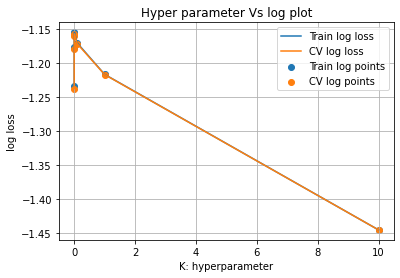

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,8.854691,0.244730,0.019517,0.003360,1e-05,{'alpha': 1e-05},-1.225744,-1.247625,-1.249594,-1.246164,-1.219385,-1.237703,0.012570,6,-1.231987,-1.235193,-1.233260,-1.250217,-1.219782,-1.234088,0.009707
1,2.787258,0.076897,0.018778,0.001081,0.0001,{'alpha': 0.0001},-1.173021,-1.181543,-1.186005,-1.180181,-1.178335,-1.179817,0.004237,4,-1.176333,-1.175249,-1.176910,-1.177517,-1.178999,-1.177002,0.001248
2,1.241543,0.040633,0.017814,0.000578,0.001,{'alpha': 0.001},-1.153720,-1.166268,-1.166028,-1.161695,-1.158181,-1.161178,0.004781,2,-1.157834,-1.157747,-1.157767,-1.157589,-1.159265,-1.158040,0.000618
3,1.021330,0.120696,0.017835,0.000732,0.01,{'alpha': 0.01},-1.152667,-1.160422,-1.160640,-1.157461,-1.156483,-1.157534,0.002925,1,-1.156664,-1.153479,-1.153724,-1.154445,-1.157278,-1.155118,0.001558
4,0.879461,0.039580,0.018739,0.000534,0.1,{'alpha': 0.1},-1.169062,-1.169050,-1.172880,-1.183717,-1.164940,-1.171930,0.006406,3,-1.172052,-1.164566,-1.168695,-1.181782,-1.166871,-1.170793,0.006015


In [ ]:
results = pd.DataFrame.from_dict(clf.cv_results_)
results = results.sort_values(['param_alpha'])

train_log_los= results['mean_train_score']
train_log_std= results['std_train_score']
cv_log_los = results['mean_test_score'] 
cv_log_std= results['std_test_score']
K =  results['param_alpha']

plt.plot(K, train_log_los, label='Train log loss')
# this code is copied from here: https://stackoverflow.com/a/48803361/4084039
# plt.gca().fill_between(K, train_auc - train_auc_std,train_auc + train_auc_std,alpha=0.2,color='darkblue')

plt.plot(K, cv_log_los, label='CV log loss')
# this code is copied from here: https://stackoverflow.com/a/48803361/4084039
# plt.gca().fill_between(K, cv_auc - cv_auc_std,cv_auc + cv_auc_std,alpha=0.2,color='darkorange')

plt.scatter(K, train_log_los, label='Train log points')
plt.scatter(K, cv_log_los, label='CV log points')


plt.legend()
plt.xlabel("K: hyperparameter")
plt.ylabel("log loss")
plt.title("Hyper parameter Vs log plot")
plt.grid()
plt.show()

results.head()

In [ ]:
clf.best_params_

{'alpha': 0.01}

In [ ]:
# This function plots the confusion matrices given y_i, y_i_hat.
def plot_confusion_matrix(test_y, predict_y):
    """This function will plot confusion matrix, precision matrix and recall matrix"""
    C = confusion_matrix(test_y, predict_y)
    A =(((C.T)/(C.sum(axis=1))).T)
    B =(C/C.sum(axis=0))
    
    labels = [1,2,3,4,5]
    # representing A in heatmap format
    print("-"*20, "Confusion matrix", "-"*20)
    plt.figure(figsize=(20,7))
    sns.heatmap(C, annot=True, cmap="YlGnBu", fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.show()

    print("-"*20, "Precision matrix (Columm Sum=1)", "-"*20)
    plt.figure(figsize=(20,7))
    sns.heatmap(B, annot=True, cmap="YlGnBu", fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.show()
    
    # representing B in heatmap format
    print("-"*20, "Recall matrix (Row sum=1)", "-"*20)
    plt.figure(figsize=(20,7))
    sns.heatmap(A, annot=True, cmap="YlGnBu", fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.show()

In [ ]:
clf = SGDClassifier(alpha=0.01, penalty='l2', loss='log', random_state=42)
clf.fit(xtrain_num, y_train)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(xtrain_num, y_train)

predict_y = sig_clf.predict_proba(xtrain_num)
print('For values of best alpha = ', 0.01, "The train log loss is:",log_loss(y_train, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(xtest_num)

print('For values of best alpha = ', 0.01, "The test log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))
predicted_y =np.argmax(predict_y,axis=1)

print('F1 score for train data',f1_score(y_train,clf.predict(xtrain_num),average="macro"))

print('F1 score for test data',f1_score(y_test,clf.predict(xtest_num),average="macro"))


print("Total number of data points :", len(predicted_y))

#today run 27/10/2021


For values of best alpha =  0.01 The train log loss is: 1.154179589066024
For values of best alpha =  0.01 The test log loss is: 1.1748507588462955
F1 score for train data 0.21012626507135423
F1 score for test data 0.2022135307639469
Total number of data points : 34680


-------------------- Confusion matrix --------------------


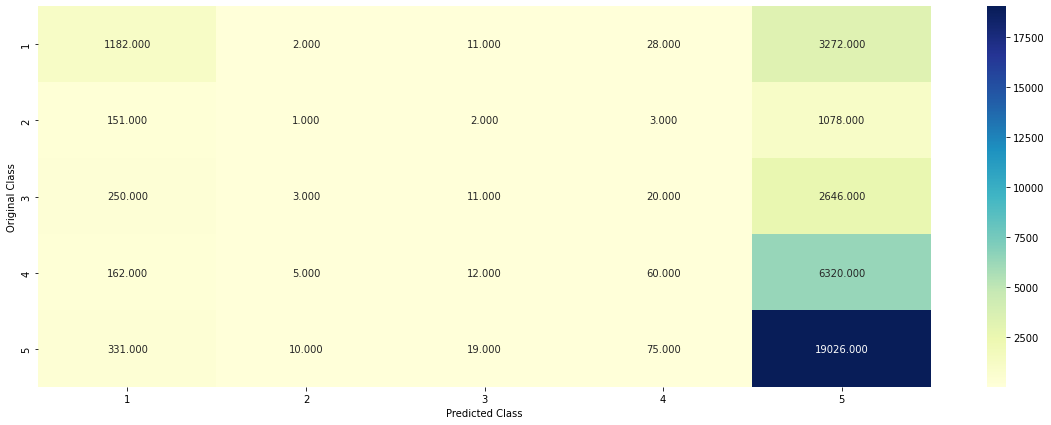

-------------------- Precision matrix (Columm Sum=1) --------------------


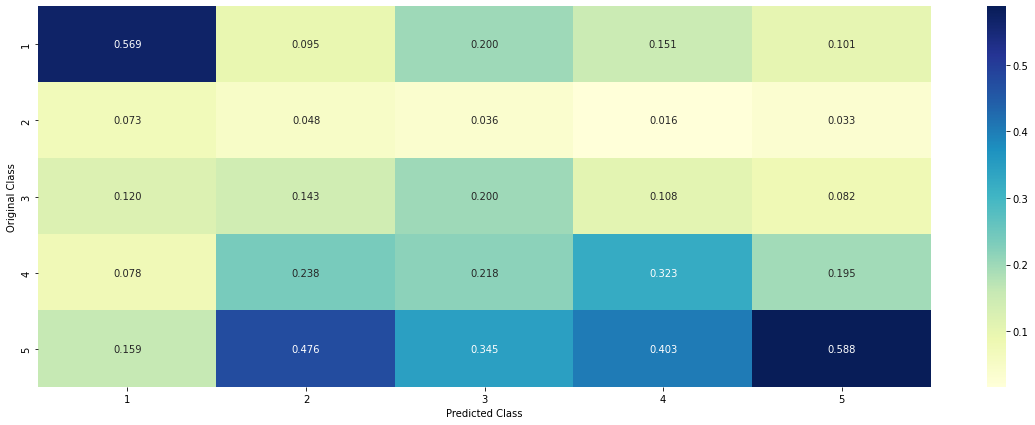

-------------------- Recall matrix (Row sum=1) --------------------


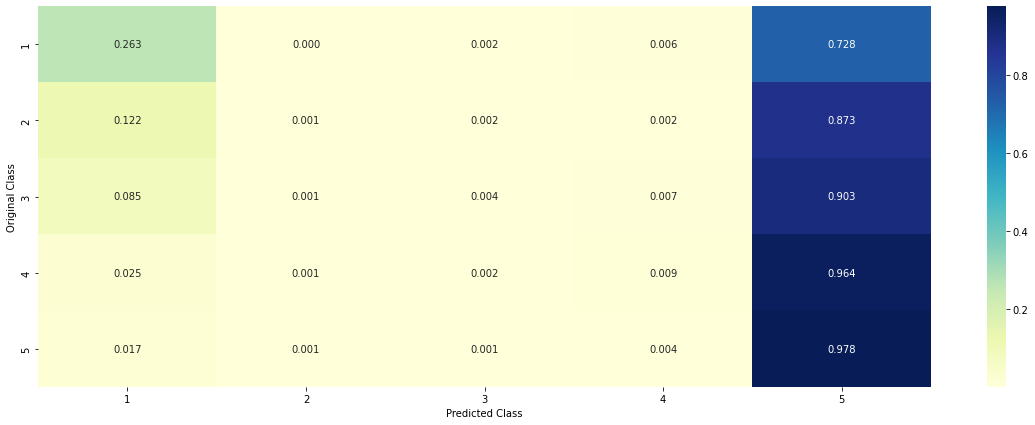

In [ ]:
plot_confusion_matrix(y_test, clf.predict(xtest_num))

In [ ]:
with open(r"/content/drive/MyDrive/LogisticRegression_Model_updated.pickle", "wb") as output_file3:
  cPickle.dump(clf,output_file3)

In [ ]:

file = open("/content/drive/MyDrive/LogisticRegression_Model_updated.pickle",'rb')
clf_logstic = pickle.load(file)
file.close()

In [ ]:
print('F1 score for train data',f1_score(y_train,clf.predict(xtrain_num),average="macro"))

print('F1 score for test data',f1_score(y_test,clf.predict(xtest_num),average="macro"))



F1 score for train data 0.21012626507135423
F1 score for test data 0.2022135307639469


In [ ]:
#clf.predict(xtest_num[3].reshape(1, -1))[0]
clf.predict(Stand.transform(X_test.iloc[1:2,:]).reshape(1, -1))[0]

5

## Applying SVM 

k-fold cross validation

In [ ]:
from sklearn.model_selection import KFold,StratifiedKFold

In [ ]:
def kfold(k,model,trains,y_trains):
  kf = StratifiedKFold(n_splits=k)
  train_log_loss=[]
  test_log_loss=[]
  for train_ind, test_ind in kf.split(trains,y_trains):
    x_tr,x_tst,y_tr,y_tst=trains[train_ind],trains[test_ind],y_trains.iloc[train_ind],y_trains.iloc[test_ind]
    model.fit(x_tr,y_tr)
    #use calibrated classifer because with hing loss not return probaliry score
    sig_clf = CalibratedClassifierCV(model, method="sigmoid")
    sig_clf.fit(x_tr, y_tr)
    predict_Train = sig_clf.predict_proba(x_tr)
    predict_Test = sig_clf.predict_proba(x_tst)

    train_log_loss.append(log_loss(y_tr, predict_Train,  eps=1e-15))
    test_log_loss.append(log_loss(y_tst, predict_Test, eps=1e-15))
    
  return np.mean(train_log_loss),np.mean(test_log_loss)

In [ ]:
alpha = [10 ** x for x in range(-5, 2)]
alpha

[1e-05, 0.0001, 0.001, 0.01, 0.1, 1, 10]

In [ ]:
alpha = [10 ** x for x in range(-5, 2)]
train_log_loss=[]
test_log_loss=[]
for i in alpha:
  SGD_linerSVM = SGDClassifier(loss='hinge', penalty='l2',n_jobs=-1,class_weight='balanced',alpha=i)  
  train_loss,test_loss = kfold(5,SGD_linerSVM,xtrain_num,y_train)
  print('for value of alpha {0} the train loss is {1} and test loss is {2}'.format(i,train_loss,test_loss))
  train_log_loss.append(train_loss)
  test_log_loss.append(test_loss)



for value of alpha 1e-05 the train loss is 1.1888048636569588 and test loss is 1.1893785160126726
for value of alpha 0.0001 the train loss is 1.1888681264079166 and test loss is 1.189439778654338
for value of alpha 0.001 the train loss is 1.1923169666299716 and test loss is 1.1928851945663324
for value of alpha 0.01 the train loss is 1.195847946963711 and test loss is 1.1962662525480323
for value of alpha 0.1 the train loss is 1.1966301241486845 and test loss is 1.197374270736106
for value of alpha 1 the train loss is 1.1954977390452757 and test loss is 1.195654154594396
for value of alpha 10 the train loss is 1.1845328500764243 and test loss is 1.1851936591530432


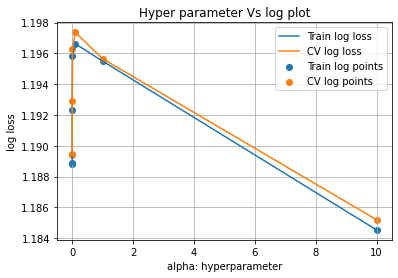

In [ ]:
train_log_loss
test_log_loss

plt.plot(alpha, train_log_loss, label='Train log loss')
plt.plot(alpha, test_log_loss, label='CV log loss')

plt.scatter(alpha, train_log_loss, label='Train log points')
plt.scatter(alpha, test_log_loss, label='CV log points')


plt.legend()
plt.xlabel("alpha: hyperparameter")
plt.ylabel("log loss")
plt.title("Hyper parameter Vs log plot")
plt.grid()
plt.show()


In [ ]:
SGD_Svm = SGDClassifier(loss='hinge', penalty='l2',n_jobs=-1,class_weight='balanced',alpha=10)
SGD_Svm.fit(xtrain_num,y_train)
sig_clf=CalibratedClassifierCV(base_estimator=SGD_Svm, method='sigmoid')
sig_clf.fit(xtrain_num,y_train)

predict_y = sig_clf.predict_proba(xtrain_num)
print('For values of best alpha = 0.0001', 0.0001, "The train log loss is:",log_loss(y_train, predict_y, labels=SGD_Svm.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(xtest_num)

print('For values of best alpha = 0.0001', 0.0001, "The test log loss is:",log_loss(y_test, predict_y, labels=SGD_Svm.classes_, eps=1e-15))
predicted_y =np.argmax(predict_y,axis=1)

print('F1 score for train data',f1_score(y_train,SGD_Svm.predict(xtrain_num),average="macro"))

print('F1 score for test data',f1_score(y_test,SGD_Svm.predict(xtest_num),average="macro"))


print("Total number of data points :", len(predicted_y))


#today run 27/10/2021

For values of best alpha = 0.0001 0.0001 The train log loss is: 1.1800823914975245
For values of best alpha = 0.0001 0.0001 The test log loss is: 1.1896257019017928
F1 score for train data 0.18834244097252822
F1 score for test data 0.18634720953136727
Total number of data points : 34680


-------------------- Confusion matrix --------------------


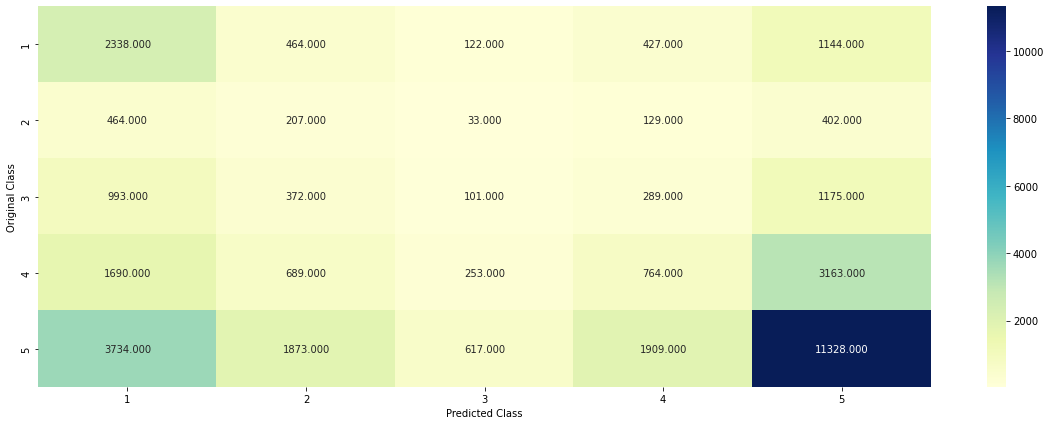

-------------------- Precision matrix (Columm Sum=1) --------------------


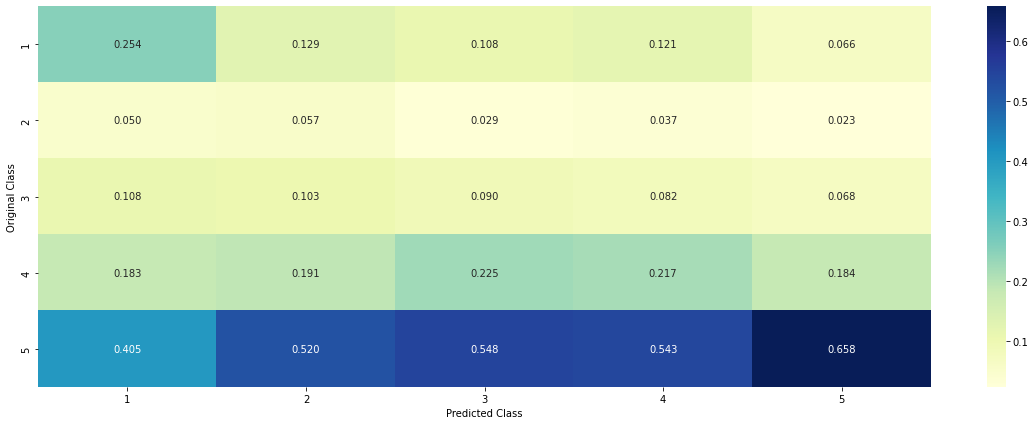

-------------------- Recall matrix (Row sum=1) --------------------


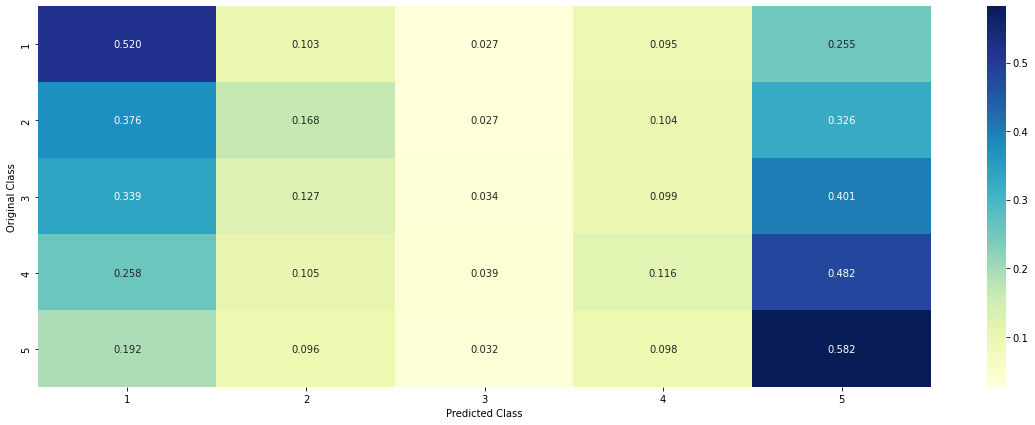

In [ ]:
plot_confusion_matrix(y_test, SGD_Svm.predict(xtest_num))

In [ ]:

#today created 27/10/2021

In [ ]:
with open(r"/content/drive/MyDrive/LinerSVM_Model_updated.pickle", "wb") as output_file3:
  cPickle.dump(SGD_Svm,output_file3)

In [ ]:
with open(r"/content/drive/MyDrive/LinerSVM_Model_sig_clf_updated.pickle", "wb") as output_file3:
  cPickle.dump(sig_clf,output_file3)

In [ ]:
file = open("/content/drive/MyDrive/LinerSVM_Model_updated.pickle",'rb')
clfSVM = pickle.load(file)
file.close()


## Kernal SVM

In [ ]:
#https://towardsdatascience.com/radial-basis-function-rbf-kernel-the-go-to-kernel-acf0d22c798a
#https://towardsdatascience.com/svm-hyperparameters-explained-with-visualizations-143e48cb701b
#https://towardsdatascience.com/complete-guide-to-pythons-cross-validation-with-examples-a9676b5cac12
alpha = [10 ** x for x in range(-5, 2)]
gama=[0.001, 0.01, 0.1,10]

SVM_KERNAL = SVC(kernel='rbf',class_weight='balanced',probability=True)
parameters = {'C':alpha}

clf = RandomizedSearchCV(SVM_KERNAL, parameters, cv=StratifiedKFold(3), scoring='neg_log_loss',return_train_score=True)
clf.fit(xtrain_num, y_train)

In [ ]:
results = pd.DataFrame.from_dict(clf.cv_results_)
results = results.sort_values(['param_C'])

train_log_los= results['mean_train_score']
train_log_std= results['std_train_score']
cv_log_los = results['mean_test_score'] 
cv_log_std= results['std_test_score']
K =  results['param_C']

plt.plot(K, train_log_los, label='Train log loss')
# this code is copied from here: https://stackoverflow.com/a/48803361/4084039
# plt.gca().fill_between(K, train_auc - train_auc_std,train_auc + train_auc_std,alpha=0.2,color='darkblue')

plt.plot(K, cv_log_los, label='CV log loss')
# this code is copied from here: https://stackoverflow.com/a/48803361/4084039
# plt.gca().fill_between(K, cv_auc - cv_auc_std,cv_auc + cv_auc_std,alpha=0.2,color='darkorange')

plt.scatter(K, train_log_los, label='Train log points')
plt.scatter(K, cv_log_los, label='CV log points')


plt.legend()
plt.xlabel("K: hyperparameter")
plt.ylabel("log loss")
plt.title("Hyper parameter Vs log plot")
plt.grid()
plt.show()

results.head()

-4
-3
-2
-1
0
1


## Random Forest

In [ ]:
#https://medium.datadriveninvestor.com/how-to-transform-the-data-to-look-like-gaussian-distribution-c50ab3fdada5
estimator=[20,50,100,150,300]
train_log_loss=[]
test_log_loss=[]
for i in estimator:
   RFClassifier=RandomForestClassifier(n_estimators=i)
   train_loss,test_loss = kfold(3,RFClassifier,xtrain_num,y_train)
   print('for value of DT {0} the train loss is {1} and test loss is {2}'.format(i,train_loss,test_loss))
   train_log_loss.append(train_loss)
   test_log_loss.append(test_loss)


for value of DT 20 the train loss is 0.4523884272035781 and test loss is 1.0402313902467644
for value of DT 50 the train loss is 0.39471968665493584 and test loss is 1.0290777899629846
for value of DT 100 the train loss is 0.3738474313719764 and test loss is 1.0249113102453944
for value of DT 150 the train loss is 0.3663561379512356 and test loss is 1.023880193568542
for value of DT 300 the train loss is 0.35903212811878654 and test loss is 1.0226282270277183


In [ ]:
RFClassifier=RandomForestClassifier(n_estimators=300)
RFClassifier.fit(xtrain_num,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=300,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

-------------------- Confusion matrix --------------------


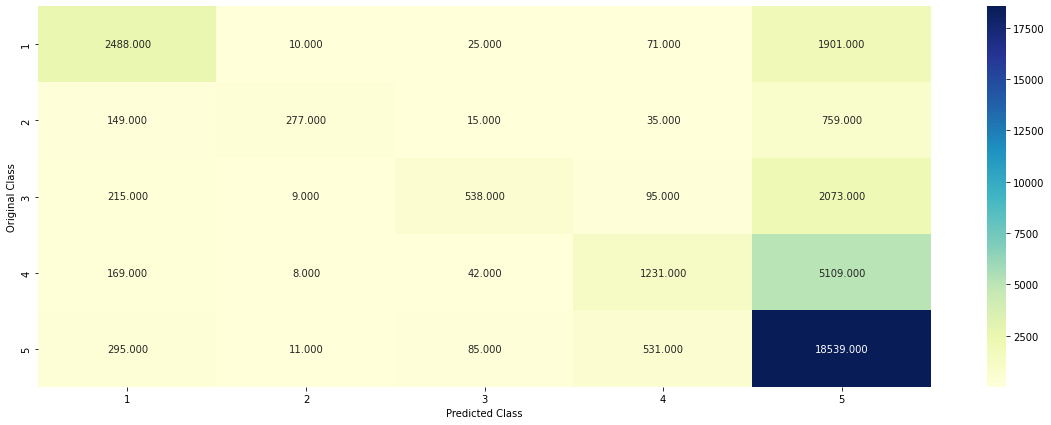

-------------------- Precision matrix (Columm Sum=1) --------------------


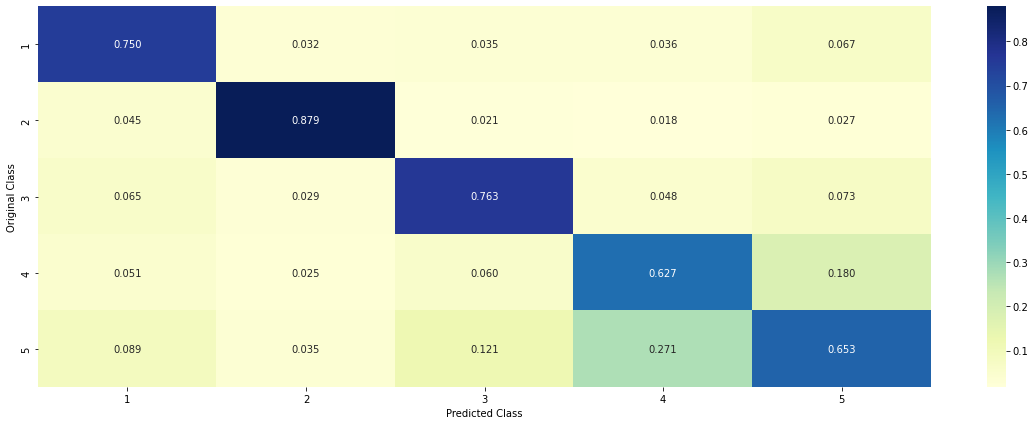

-------------------- Recall matrix (Row sum=1) --------------------


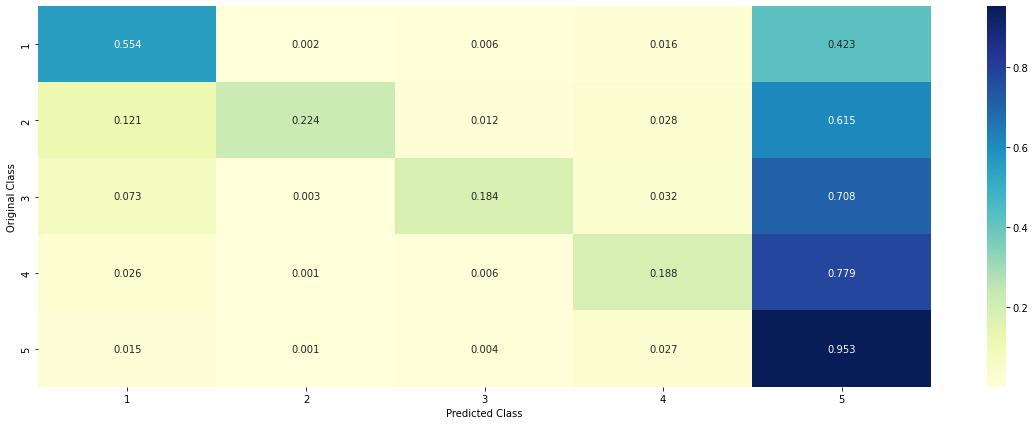

In [ ]:
plot_confusion_matrix(y_test, RFClassifier.predict(xtest_num))

In [ ]:
y_train_predict=RFClassifier.predict(xtrain_num)
y_test_predict=RFClassifier.predict(xtest_num)

print('Train f1 score is {0}'.format(f1_score(y_train,y_train_predict,average="macro")))
print('Test f1 score is {0}'.format(f1_score(y_test,y_test_predict,average="macro")))


Train f1 score is 0.9963564171366169
Test f1 score is 0.47087787959907174


In [ ]:
with open(r"/content/drive/MyDrive/RandomForest_updated.pickle", "wb") as output_file3:
  cPickle.dump(RFClassifier,output_file3)

In [ ]:
file = open("/content/drive/MyDrive/RandomForest_updated.pickle",'rb')
RFClassifier = pickle.load(file)
file.close()

## XGBoost Classifier

In [ ]:
lr=[0.0001, 0.001, 0.01, 0.1, 1, 10]
mdepth=[2,3,4,5,6,7,8]
estimator=[5,10,50,100,200,250]
xgb=XGBClassifier(class_weight='balanced')
parameter={'learning_rate':lr,'max_depth':mdepth,'n_estimators':estimator}
xgb=XGBClassifier()
clf = RandomizedSearchCV(xgb, parameter, cv=StratifiedKFold(3), scoring='neg_log_loss',return_train_score=True)
clf.fit(xtrain_num, y_train)

RandomizedSearchCV(cv=StratifiedKFold(n_splits=3, random_state=None, shuffle=False),
                   error_score=nan,
                   estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                           colsample_bylevel=1,
                                           colsample_bynode=1,
                                           colsample_bytree=1, gamma=0,
                                           learning_rate=0.1, max_delta_step=0,
                                           max_depth=3, min_child_weight=1,
                                           missing=None, n_estimators=100,
                                           n_jobs=1, nthread=None,
                                           objective='b...
                                           reg_lambda=1, scale_pos_weight=1,
                                           seed=None, silent=None, subsample=1,
                                           verbosity=1),
                   iid='deprecat

In [ ]:
clf.best_params_
#clf.rse

{'learning_rate': 0.1, 'max_depth': 6, 'n_estimators': 100}

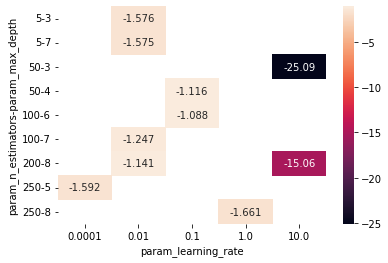

In [ ]:
import seaborn as sns
results_data = pd.DataFrame.from_dict(clf.cv_results_)
max_scores = results_data.groupby(['param_n_estimators', 'param_max_depth','param_learning_rate']).max()
max_scores = max_scores.unstack()[['mean_test_score', 'mean_train_score']]
sns.heatmap(max_scores.mean_test_score, annot=True, fmt='.4g');




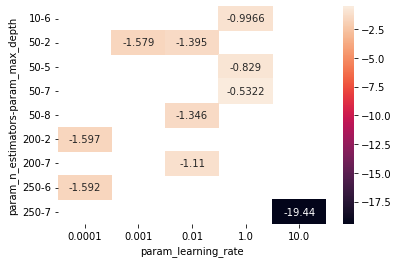

In [ ]:
sns.heatmap(max_scores.mean_train_score, annot=True, fmt='.4g');

In [ ]:
#https://towardsdatascience.com/xgboost-mathematics-explained-58262530904a
xgb=XGBClassifier(class_weight='balanced',learning_rate=0.1,n_estimators=100,max_depth=6)
xgb.fit(xtrain_num,y_train)



XGBClassifier(base_score=0.5, booster='gbtree', class_weight='balanced',
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              gamma=0, learning_rate=0.1, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='multi:softprob', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [ ]:
y_train_predict=xgb.predict(xtrain_num)
y_test_predict=xgb.predict(xtest_num)
print('Train f1 score is {0}'.format(f1_score(y_train,y_train_predict,average="macro")))
print('Test f1 score is {0}'.format(f1_score(y_test,y_test_predict,average="macro")))

Train f1 score is 0.31580980591824304
Test f1 score is 0.2770065667296845


-------------------- Confusion matrix --------------------


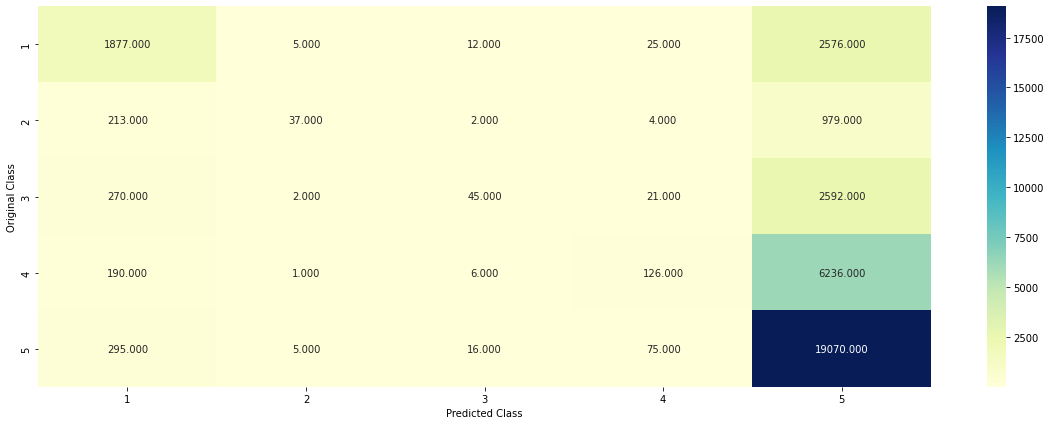

-------------------- Precision matrix (Columm Sum=1) --------------------


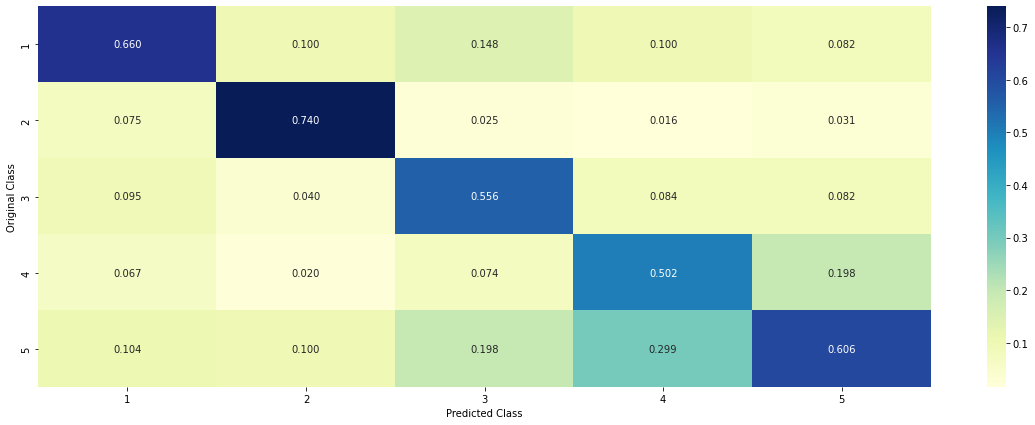

-------------------- Recall matrix (Row sum=1) --------------------


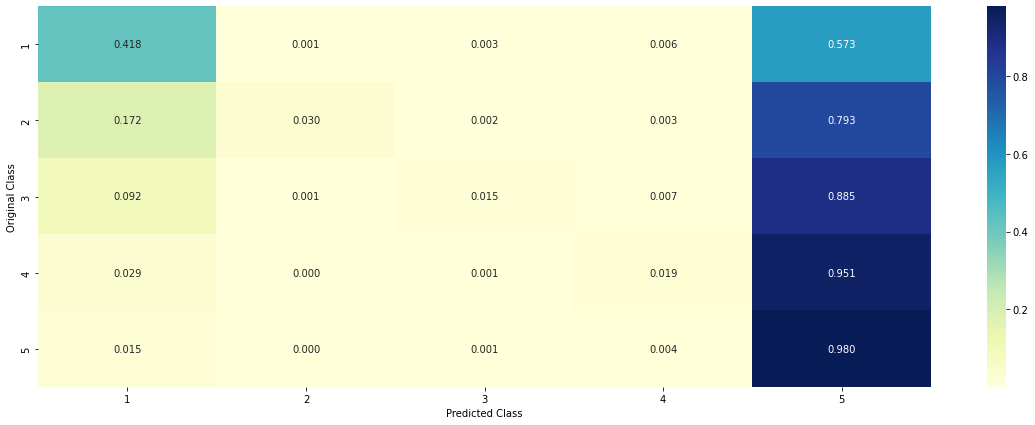

In [ ]:
plot_confusion_matrix(y_test, xgb.predict(xtest_num))

In [ ]:
with open(r"/content/drive/MyDrive/xgboost_NEW1.pickle", "wb") as output_file3:
  cPickle.dump(xgb,output_file3)

In [ ]:
file = open("/content/drive/MyDrive/xgboost_NEW1.pickle",'rb')
clfxgb = pickle.load(file)
file.close()



In [ ]:
results = pd.DataFrame.from_dict(clf.cv_results_)
#results = results.sort_values(['param_C'])

# train_log_los= results['mean_train_score']
# train_log_std= results['std_train_score']
# cv_log_los = results['mean_test_score'] 
# cv_log_std= results['std_test_score']
# K =  results['param_C']

In [ ]:
# !pip install -U imbalanced-learn
# !pip install imblearn
# !pip install imblearn
# !pip install -c glemaitre imbalanced-learn
# !pip install imblearn==0.0

# from imblearn.over_sampling import SMOTE
# oversample = SMOTE()
# X, y = oversample.fit_resample(X1, y1)

In [ ]:


for i in range(0,10):
  
  print('Pridcted value is {0} and actual value is {1}'.format(xgb.predict(Stand.transform(X_test.iloc[i:i+1,:]).reshape(1, -1))[0],list(y_test[i:i+1])[0]))




Pridcted value is 4 and actual value is 4
Pridcted value is 5 and actual value is 5
Pridcted value is 5 and actual value is 5
Pridcted value is 1 and actual value is 1
Pridcted value is 1 and actual value is 1
Pridcted value is 3 and actual value is 3
Pridcted value is 4 and actual value is 4
Pridcted value is 5 and actual value is 5
Pridcted value is 1 and actual value is 1
Pridcted value is 5 and actual value is 5


In [ ]:
X_test.iloc[0:11,:]

,payment_sequential,payment_installments,payment_value,price,freight_value,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,price_new,freight_value_new,product_length_cm_new,payment_value_new,Duration_delivered_Purchase_days,Delivered_Within_Estimated,customer_state_class_5,customer_state_class_4,customer_state_class_3,customer_state_class_2,customer_state_class_1,order_status_class_5,order_status_class_4,order_status_class_3,order_status_class_2,order_status_class_1,payment_type_class_5,payment_type_class_4,payment_type_class_3,payment_type_class_2,payment_type_class_1,seller_city_class_5,seller_city_class_4,seller_city_class_3,seller_city_class_2,seller_city_class_1,seller_state_class_5,seller_state_class_4,seller_state_class_3,seller_state_class_2,seller_state_class_1,product_category_name_english_class_5,product_category_name_english_class_4,product_category_name_english_class_3,product_category_name_english_class_2,product_category_name_english_class_1,Month_Year_Purchase_Order_class_5,Month_Year_Purchase_Order_class_4,Month_Year_Purchase_Order_class_3,Month_Year_Purchase_Order_class_2,Month_Year_Purchase_Order_class_1,Month_year_order_deliverd_class_5,Month_year_order_deliverd_class_4,Month_year_order_deliverd_class_3,Month_year_order_deliverd_class_2,Month_year_order_deliverd_class_1
11489,1,5,60.34,47.99,12.35,45.0,1253.0,4.0,200.0,16.0,7.0,11.0,143.970,28.405,11.20,362.040,8,16,0.578449,0.187320,0.083502,0.032231,0.118498,0.571667,0.192038,0.084651,0.034760,0.116885,0.562752,0.188466,0.083993,0.034847,0.129942,0.523810,0.142857,0.047619,0.095238,0.190476,0.607814,0.165981,0.067568,0.027321,0.131316,0.553801,0.205989,0.074696,0.036196,0.129319,0.614829,0.192447,0.069703,0.031936,0.091086,0.625471,0.178514,0.075929,0.032579,0.087507
100677,1,8,95.80,79.00,16.80,58.0,945.0,1.0,1167.0,18.0,17.0,23.0,15.800,6.720,1.80,19.160,9,17,0.588035,0.189775,0.081813,0.032708,0.107669,0.571667,0.192038,0.084651,0.034760,0.116885,0.562752,0.188466,0.083993,0.034847,0.129942,0.607330,0.198953,0.078534,0.019197,0.095986,0.611780,0.195693,0.070931,0.014566,0.107030,0.545924,0.215170,0.075335,0.037668,0.125903,0.512651,0.187268,0.088316,0.045447,0.166317,0.531954,0.191887,0.085762,0.042219,0.148179
52788,1,4,138.24,99.99,16.32,54.0,995.0,1.0,700.0,44.0,24.0,31.0,19.998,38.250,44.00,27.648,11,25,0.548009,0.175644,0.096019,0.051522,0.128806,0.571667,0.192038,0.084651,0.034760,0.116885,0.562752,0.188466,0.083993,0.034847,0.129942,0.558296,0.189196,0.082687,0.039786,0.130035,0.552250,0.189685,0.087367,0.038114,0.132584,0.588110,0.196155,0.082236,0.032396,0.101104,0.554217,0.201152,0.090885,0.029073,0.124673,0.569822,0.204498,0.076360,0.031642,0.117678
85057,1,1,70.28,19.90,15.24,38.0,175.0,1.0,375.0,16.0,14.0,15.0,119.400,45.720,14.24,632.520,4,23,0.588035,0.189775,0.081813,0.032708,0.107669,0.571667,0.192038,0.084651,0.034760,0.116885,0.554273,0.192556,0.087814,0.034999,0.130358,0.583818,0.176368,0.065192,0.029686,0.144936,0.607814,0.165981,0.067568,0.027321,0.131316,0.626112,0.157235,0.066289,0.031932,0.118432,0.631610,0.176342,0.071173,0.025646,0.095229,0.636402,0.173813,0.070618,0.024590,0.094578
35046,1,1,175.86,49.90,8.72,48.0,222.0,4.0,400.0,18.0,20.0,20.0,299.400,26.160,16.02,215.370,10,0,0.588035,0.189775,0.081813,0.032708,0.107669,0.030534,0.019084,0.038168,0.083969,0.828244,0.554273,0.192556,0.087814,0.034999,0.130358,0.558296,0.189196,0.082687,0.039786,0.130035,0.552250,0.189685,0.087367,0.038114,0.132584,0.568085,0.187621,0.084139,0.037331,0.122824,0.512651,0.187268,0.088316,0.045447,0.166317,0.531954,0.191887,0.085762,0.042219,0.148179
113030,1,1,185.27,169.99,15.28,41.0,971.0,1.0,1300.0,16.0,19.0,16.0,169.990,61.120,12.80,215.370,6,19,0.588035,0.189775,0.081813,0.032708,0.107669,0.571667,0.192038,0.084651,0.034760,0.116885,0.562752,0.188466,0.083993,0.034847,0.129942,0.556367,0.215031,0.091858,0.034447,0.102296,0.552250,0.189685,0.087367,0.03

In [ ]:
y_test[0:11]

11489     4
100677    5
52788     5
85057     1
35046     1
113030    3
59012     4
67907     5
84235     1
56949     5
31606     1
Name: review_score, dtype: int64

###Stacking Ensamble Technique (Combine all previous Model and meta classifier is Logistic Regression)

Get the predicted Probability of all data point and create the xi's and yi is actual class label 

In [ ]:
#clf_logstic,clfSVM,RFClassifier,clfxgb

In [ ]:
logistic_prob=clf_logstic.predict_proba(xtrain_num)
sig_clf=CalibratedClassifierCV(base_estimator=clfSVM, method='sigmoid')
sig_clf.fit(xtrain_num,y_train)
lrsvm_prob=sig_clf.predict_proba(xtrain_num)
RF_Prob=RFClassifier.predict_proba(xtrain_num)
XGB_Prob=xgb.predict_proba(xtrain_num)


In [ ]:
with open(r"/content/drive/MyDrive/CalibratedClassifierCV_for_ensamble_NEW1.pickle", "wb") as output_file3:
  cPickle.dump(sig_clf,output_file3)

In [ ]:
Input=np.hstack((logistic_prob,lrsvm_prob,RF_Prob,XGB_Prob))

Meta Classifier is Logistic Regression

In [ ]:
alpha = [10 ** x for x in range(-5, 2)]
train_log_loss=[]
test_log_loss=[]
for i in alpha:
  SGD_logstic = SGDClassifier(loss='log', penalty='l2',n_jobs=-1,class_weight='balanced',alpha=i)  
  train_loss,test_loss = kfold(5,SGD_logstic,Input,y_train)
  print('for value of alpha {0} the train loss is {1} and test loss is {2}'.format(i,train_loss,test_loss))
  train_log_loss.append(train_loss)
  test_log_loss.append(test_loss)

for value of alpha 1e-05 the train loss is 0.00425843206705711 and test loss is 0.0043935298787064385
for value of alpha 0.0001 the train loss is 0.0043934386736234204 and test loss is 0.004452714700933079
for value of alpha 0.001 the train loss is 0.004771024282414972 and test loss is 0.00481505544910327
for value of alpha 0.01 the train loss is 0.006999167087040128 and test loss is 0.007048178415807196
for value of alpha 0.1 the train loss is 0.016928182046910448 and test loss is 0.016959844610026205
for value of alpha 1 the train loss is 0.030443789218296314 and test loss is 0.030413335893294313
for value of alpha 10 the train loss is 0.24152939751529967 and test loss is 0.24155345859530067


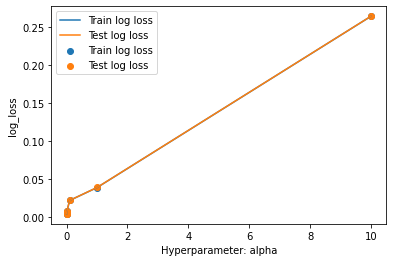

In [ ]:
plt.plot(alpha,train_log_loss,label='Train log loss')
plt.plot(alpha,test_log_loss,label='Test log loss')
plt.scatter(alpha,train_log_loss,label='Train log loss')
plt.scatter(alpha,test_log_loss,label='Test log loss')

plt.legend()
plt.xlabel('Hyperparameter: alpha')
plt.ylabel('log_loss')
plt.show()


In [ ]:
logistic_prob_test=clf.predict_proba(xtest_num)
# sig_clf_test=CalibratedClassifierCV(base_estimator=clfSVM, method='sigmoid')
# sig_clf_test.fit(xtrain_num,y_train)
lrsvm_prob_test=sig_clf.predict_proba(xtest_num)
RF_Prob_test=RFClassifier.predict_proba(xtest_num)
XGB_Prob_test=xgb.predict_proba(xtest_num)
Input_test=np.hstack((logistic_prob_test,lrsvm_prob_test,RF_Prob_test,XGB_Prob_test))

In [ ]:
SGD_logstic_Meta_Classifier = SGDClassifier(loss='log', penalty='l2',n_jobs=-1,class_weight='balanced',alpha=0.00001)
SGD_logstic_Meta_Classifier.fit(Input,y_train)

print('F1 score of train is {0}'.format(f1_score(y_train,SGD_logstic_Meta_Classifier.predict(Input),average='macro')))
print('F1 score of test is {0}'.format(f1_score(y_test,SGD_logstic_Meta_Classifier.predict(Input_test),average='macro')))

F1 score of train is 0.9964326946641899
F1 score of test is 0.48476892512563446


In [ ]:
with open(r"/content/drive/MyDrive/Ensamble_Logitic_Classifier_new1.pickle", "wb") as output_file3:
  cPickle.dump(SGD_logstic_Meta_Classifier,output_file3)

-------------------- Confusion matrix --------------------


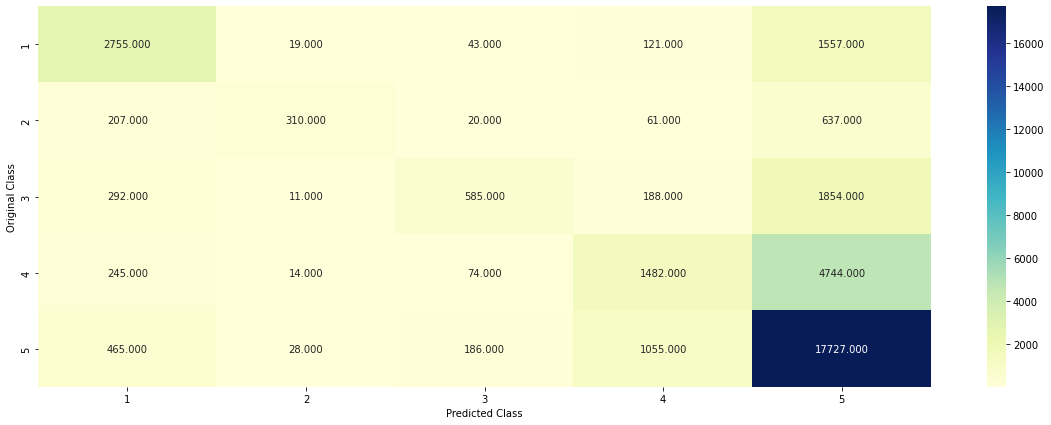

-------------------- Precision matrix (Columm Sum=1) --------------------


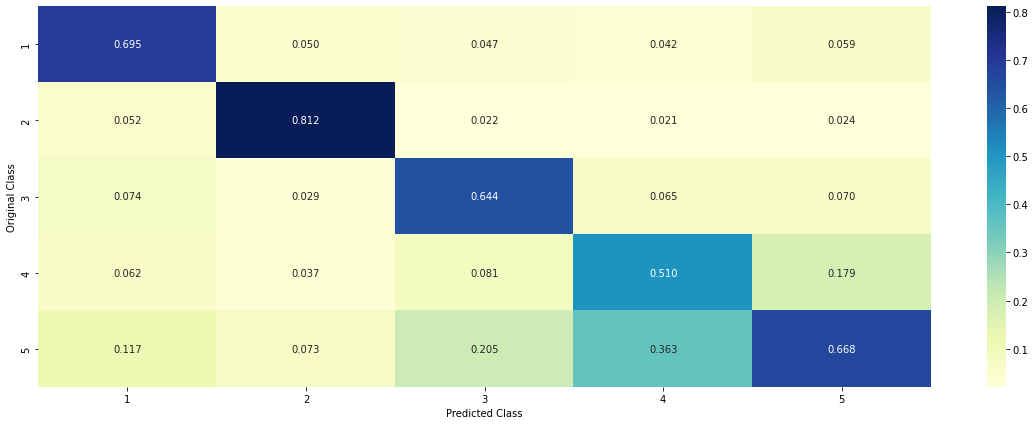

-------------------- Recall matrix (Row sum=1) --------------------


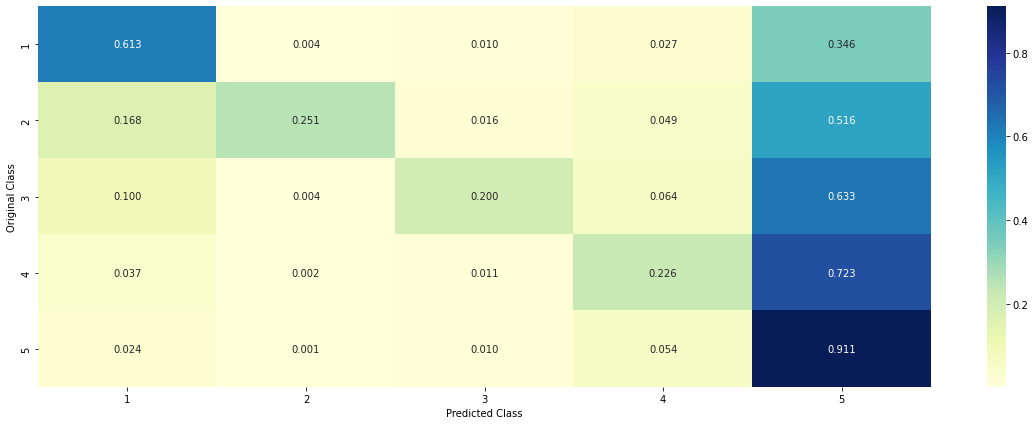

In [ ]:
plot_confusion_matrix(y_test, SGD_logstic_Meta_Classifier.predict(Input_test))

## Apply PCA ON Train set

In [ ]:
pca = PCA(.95)
pca.fit(xtrain_num)

xtrain_num_pca = pca.transform(xtrain_num)
xtest_num_pca = pca.transform(xtest_num)

In [ ]:
with open(r"/content/drive/MyDrive/PCA2_TRAINSET.pickle", "wb") as output_file3:
  cPickle.dump(pca,output_file3)

In [ ]:
with open(r"/content/drive/MyDrive/X_trainPCA1.pickle", "wb") as output_file3:
  cPickle.dump(xtrain_num_pca,output_file3)

In [ ]:
with open(r"/content/drive/MyDrive/X_TESTPCA1.pickle", "wb") as output_file3:
  cPickle.dump(xtest_num_pca,output_file3)

In [ ]:
alpha = [10 ** x for x in range(-5, 2)]
train_log_loss=[]
test_log_loss=[]
for i in alpha:
  SGD_logstic_PCA = SGDClassifier(loss='log', penalty='l2',n_jobs=-1,class_weight='balanced',alpha=i)  
  train_loss,test_loss = kfold(5,SGD_logstic_PCA,xtrain_num_pca,y_train)
  print('for value of alpha {0} the train loss is {1} and test loss is {2}'.format(i,train_loss,test_loss))
  train_log_loss.append(train_loss)
  test_log_loss.append(test_loss)

for value of alpha 1e-05 the train loss is 1.1715858990975896 and test loss is 1.1722244247002886
for value of alpha 0.0001 the train loss is 1.1561487804193744 and test loss is 1.1574439234184868
for value of alpha 0.001 the train loss is 1.1483407934687746 and test loss is 1.1500855070287088
for value of alpha 0.01 the train loss is 1.1460848171057076 and test loss is 1.1479341093656932
for value of alpha 0.1 the train loss is 1.1483965018425235 and test loss is 1.1499538041963997
for value of alpha 1 the train loss is 1.1593916903258923 and test loss is 1.1603821136345067
for value of alpha 10 the train loss is 1.1653150583899348 and test loss is 1.1661165219935115


## With Class Balancing

In [ ]:
# This function plots the confusion matrices given y_i, y_i_hat.
def plot_confusion_matrix_new(test_y, predict_y):
    """This function will plot confusion matrix, precision matrix and recall matrix"""
    C = confusion_matrix(test_y, predict_y)
    A =(((C.T)/(C.sum(axis=1))).T)
    B =(C/C.sum(axis=0))
    
    labels = [0,1]
    # representing A in heatmap format
    print("-"*20, "Confusion matrix", "-"*20)
    plt.figure(figsize=(20,7))
    sns.heatmap(C, annot=True, cmap="YlGnBu", fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.show()

    print("-"*20, "Precision matrix (Columm Sum=1)", "-"*20)
    plt.figure(figsize=(20,7))
    sns.heatmap(B, annot=True, cmap="YlGnBu", fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.show()
    
    # representing B in heatmap format
    print("-"*20, "Recall matrix (Row sum=1)", "-"*20)
    plt.figure(figsize=(20,7))
    sns.heatmap(A, annot=True, cmap="YlGnBu", fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.show()

In [ ]:
def kfold_new(k,model,trains,y_trains):
  kf = StratifiedKFold(n_splits=k)
  train_log_loss=[]
  test_log_loss=[]
  for train_ind, test_ind in kf.split(trains,y_trains):
    x_tr,x_tst,y_tr,y_tst=trains[train_ind],trains[test_ind],y_trains[train_ind],y_trains[test_ind]
    model.fit(x_tr,y_tr)
    #use calibrated classifer because with hing loss not return probaliry score
    sig_clf = CalibratedClassifierCV(model, method="sigmoid")
    sig_clf.fit(x_tr, y_tr)
    predict_Train = sig_clf.predict_proba(x_tr)
    predict_Test = sig_clf.predict_proba(x_tst)

    train_log_loss.append(log_loss(y_tr, predict_Train,  eps=1e-15))
    test_log_loss.append(log_loss(y_tst, predict_Test, eps=1e-15))
    
  return np.mean(train_log_loss),np.mean(test_log_loss)

In [ ]:
y_train.apply(lambda review_score: 0 if review_score<5 else 1)

77251    0
29910    1
59043    1
18667    1
5604     0
        ..
69673    1
30094    1
62219    0
97788    0
20389    0
Name: review_score, Length: 80917, dtype: int64

In [ ]:
y_train_new=y_train.apply(lambda review_score: 0 if review_score<5 else 1)


In [ ]:
y_test_new=y_test.apply(lambda review_score: 0 if review_score<5 else 1)

In [ ]:
#https://stackoverflow.com/questions/65280842/smote-could-not-convert-string-to-float
oversample_smote = SMOTE()
X_resample, y_resampled = SMOTE().fit_resample(xtrain_num, y_train_new) 

In [ ]:
print("class distribution BEFORE SMOTE in train data: \n",y_train_new.value_counts())
print("class distribution AFTER SMOTE in train data: \n",pd.DataFrame ({'values': y_resampled }).value_counts())


class distribution BEFORE SMOTE in train data: 
 1    45406
0    35511
Name: review_score, dtype: int64
class distribution AFTER SMOTE in train data: 
 values
1         45406
0         45406
dtype: int64


In [ ]:
alpha = [10 ** x for x in range(-5, 2)]

neigh = SGDClassifier(loss='log', penalty='l2',n_jobs=-1)
parameters = {'alpha':alpha}

clf = RandomizedSearchCV(neigh, parameters, cv=StratifiedKFold(5), scoring='neg_log_loss',return_train_score=True)
clf.fit(X_resample, y_resampled)

RandomizedSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
                   error_score=nan,
                   estimator=SGDClassifier(alpha=0.0001, average=False,
                                           class_weight=None,
                                           early_stopping=False, epsilon=0.1,
                                           eta0=0.0, fit_intercept=True,
                                           l1_ratio=0.15,
                                           learning_rate='optimal', loss='log',
                                           max_iter=1000, n_iter_no_change=5,
                                           n_jobs=-1, penalty='l2', power_t=0.5,
                                           random_state=None, shuffle=True,
                                           tol=0.001, validation_fraction=0.1,
                                           verbose=0, warm_start=False),
                   iid='deprecated', n_iter=10, n_jobs=None,
        

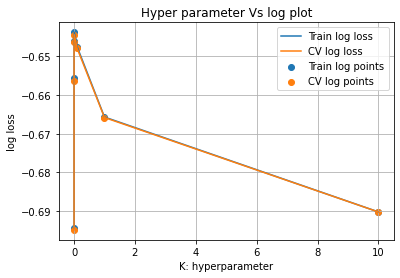

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,3.016657,0.229690,0.009386,0.000370,1e-05,{'alpha': 1e-05},-0.706261,-0.684336,-0.720865,-0.682768,-0.680165,-0.694879,0.015995,7,-0.701648,-0.682002,-0.711199,-0.683419,-0.693800,-0.694414,0.011040
1,1.018804,0.094037,0.009933,0.000868,0.0001,{'alpha': 0.0001},-0.655862,-0.653900,-0.657373,-0.660444,-0.654453,-0.656406,0.002351,4,-0.653597,-0.656562,-0.652327,-0.656894,-0.658859,-0.655648,0.002364
2,0.464961,0.063031,0.009470,0.000121,0.001,{'alpha': 0.001},-0.647688,-0.645221,-0.651170,-0.645952,-0.641631,-0.646332,0.003122,2,-0.646197,-0.646308,-0.645137,-0.645385,-0.646834,-0.645972,0.000624
3,0.294470,0.002428,0.009183,0.000414,0.01,{'alpha': 0.01},-0.644656,-0.643937,-0.648640,-0.644110,-0.640544,-0.644377,0.002577,1,-0.643438,-0.644243,-0.642608,-0.643651,-0.644706,-0.643729,0.000717
4,0.268621,0.007366,0.009208,0.000545,0.1,{'alpha': 0.1},-0.647522,-0.647695,-0.650908,-0.647238,-0.646013,-0.647875,0.001626,3,-0.647455,-0.647584,-0.646477,-0.647521,-0.648163,-0.647440,0.000544


In [ ]:
results = pd.DataFrame.from_dict(clf.cv_results_)
results = results.sort_values(['param_alpha'])

train_log_los= results['mean_train_score']
train_log_std= results['std_train_score']
cv_log_los = results['mean_test_score'] 
cv_log_std= results['std_test_score']
K =  results['param_alpha']

plt.plot(K, train_log_los, label='Train log loss')
# this code is copied from here: https://stackoverflow.com/a/48803361/4084039
# plt.gca().fill_between(K, train_auc - train_auc_std,train_auc + train_auc_std,alpha=0.2,color='darkblue')

plt.plot(K, cv_log_los, label='CV log loss')
# this code is copied from here: https://stackoverflow.com/a/48803361/4084039
# plt.gca().fill_between(K, cv_auc - cv_auc_std,cv_auc + cv_auc_std,alpha=0.2,color='darkorange')

plt.scatter(K, train_log_los, label='Train log points')
plt.scatter(K, cv_log_los, label='CV log points')


plt.legend()
plt.xlabel("K: hyperparameter")
plt.ylabel("log loss")
plt.title("Hyper parameter Vs log plot")
plt.grid()
plt.show()

results.head()

In [ ]:
clf.best_params_

{'alpha': 0.01}

In [ ]:
clf = SGDClassifier(alpha=0.01, penalty='l2', loss='log', random_state=42)
clf.fit(X_resample, y_resampled)

sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(X_resample, y_resampled)


predict_y = sig_clf.predict_proba(X_resample)
print('For values of best alpha = ', 0.01, "The train log loss is:",log_loss(y_resampled, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(xtest_num)

print('For values of best alpha = ', 0.01, "The test log loss is:",log_loss(y_test_new, predict_y, labels=clf.classes_, eps=1e-15))
predicted_y =np.argmax(predict_y,axis=1)

print('F1 score for train data',f1_score(y_resampled,clf.predict(X_resample),average="macro"))

print('F1 score for test data',f1_score(y_test_new,clf.predict(xtest_num),average="macro"))


print("Total number of data points :", len(predicted_y))


#today run 27/10/2021

For values of best alpha =  0.01 The train log loss is: 0.6434580852726517
For values of best alpha =  0.01 The test log loss is: 0.6484292258597587
F1 score for train data 0.6141369723733219
F1 score for test data 0.6093401199855597
Total number of data points : 34680


In [ ]:
# plot_confusion_matrix_new(y_test_new, clf.predict(xtest_num))

In [ ]:
with open(r"/content/drive/MyDrive/LogisticRegression_class_balanced_0_1_NEW1.pickle", "wb") as output_file3:
  cPickle.dump(clf,output_file3)

## Linear SVM with class balanced

In [ ]:
alpha = [10 ** x for x in range(-5, 2)]
train_log_loss=[]
test_log_loss=[]
for i in alpha:
  SGD_linerSVM = SGDClassifier(loss='hinge', penalty='l2',n_jobs=-1,class_weight='balanced',alpha=i)  
  train_loss,test_loss = kfold_new(5,SGD_linerSVM,X_resample, y_resampled)
  print('for value of alpha {0} the train loss is {1} and test loss is {2}'.format(i,train_loss,test_loss))
  train_log_loss.append(train_loss)
  test_log_loss.append(test_loss)



for value of alpha 1e-05 the train loss is 0.6586586955883249 and test loss is 0.6592406413519327
for value of alpha 0.0001 the train loss is 0.6472944379275811 and test loss is 0.6480812541513109
for value of alpha 0.001 the train loss is 0.6455055842678747 and test loss is 0.6462676521582461
for value of alpha 0.01 the train loss is 0.6453001465914712 and test loss is 0.6460731873709332
for value of alpha 0.1 the train loss is 0.6470798441343096 and test loss is 0.6476919168269738
for value of alpha 1 the train loss is 0.656392344846779 and test loss is 0.6566389167293339
for value of alpha 10 the train loss is 0.6578519424705206 and test loss is 0.6580556444513854


In [ ]:
svm_clf = SGDClassifier(loss='hinge', penalty='l2',n_jobs=-1,class_weight='balanced',alpha=0.01)
svm_clf.fit(X_resample, y_resampled)

sig_clf = CalibratedClassifierCV(svm_clf, method="sigmoid")
sig_clf.fit(X_resample, y_resampled)


predict_y = sig_clf.predict_proba(X_resample)
print('For values of best alpha = ', 0.01, "The train log loss is:",log_loss(y_resampled, predict_y, labels=svm_clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(xtest_num)

print('For values of best alpha = ', 0.01, "The test log loss is:",log_loss(y_test_new, predict_y, labels=svm_clf.classes_, eps=1e-15))
predicted_y =np.argmax(predict_y,axis=1)

print('F1 score for train data',f1_score(y_resampled,svm_clf.predict(X_resample),average="macro"))

print('F1 score for test data',f1_score(y_test_new,svm_clf.predict(xtest_num),average="macro"))


print("Total number of data points :", len(predicted_y))


#today run 27/10/2021

For values of best alpha =  0.01 The train log loss is: 0.6452420288649752
For values of best alpha =  0.01 The test log loss is: 0.6487701237236846
F1 score for train data 0.6122459029783975
F1 score for test data 0.6151821894390275
Total number of data points : 34680


-------------------- Confusion matrix --------------------


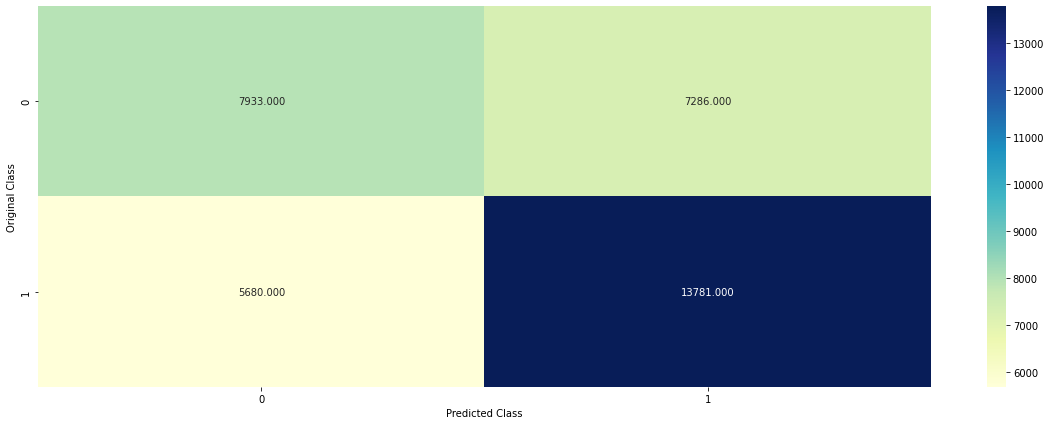

-------------------- Precision matrix (Columm Sum=1) --------------------


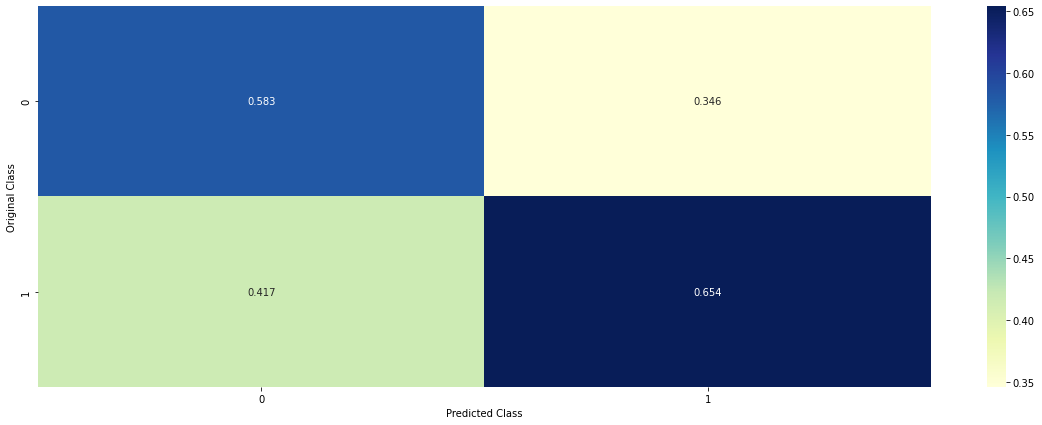

-------------------- Recall matrix (Row sum=1) --------------------


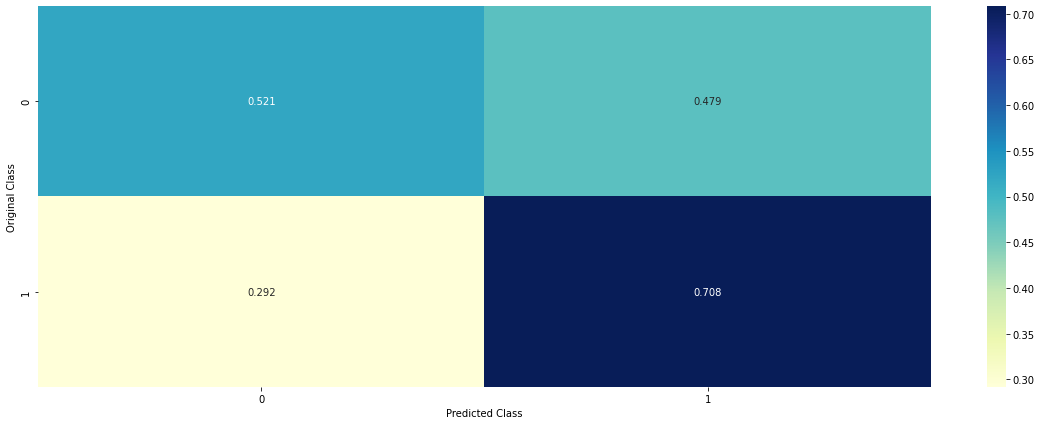

In [ ]:
plot_confusion_matrix_new(y_test_new, svm_clf.predict(xtest_num))

In [ ]:

#today created 27/10/2021

In [ ]:
with open(r"/content/drive/MyDrive/SVM_class_balanced_0_1_NEW2.pickle", "wb") as output_file3:
  cPickle.dump(svm_clf,output_file3)

In [ ]:
with open(r"/content/drive/MyDrive/SVM_class_balanced_0_1_CalibratedClassifier_NEW2.pickle", "wb") as output_file3:
  cPickle.dump(sig_clf,output_file3)

## Random Forest with class balanced

In [ ]:
estimator=[20,50,100,150,200,300]
train_log_loss=[]
test_log_loss=[]
for i in estimator:
   RFClassifier_ClassBalanced=RandomForestClassifier(n_estimators=i)
   train_loss,test_loss = kfold_new(5,RFClassifier_ClassBalanced,X_resample, y_resampled)
   print('for value of DT {0} the train loss is {1} and test loss is {2}'.format(i,train_loss,test_loss))
   train_log_loss.append(train_loss)
   test_log_loss.append(test_loss)

for value of DT 300 the train loss is 0.16663407733616703 and test loss is 0.5392502147706657


In [ ]:
RFClassifier=RandomForestClassifier(n_estimators=300)
RFClassifier.fit(X_resample, y_resampled)

rf_clai=CalibratedClassifierCV(RFClassifier,method='sigmoid')
rf_clai.fit(X_resample, y_resampled)

y_train_predict_prob=rf_clai.predict_proba(X_resample)
y_test_predict_prob=rf_clai.predict_proba(xtest_num)

print( "The train log loss is:",log_loss(y_resampled, y_train_predict_prob, labels=RFClassifier.classes_, eps=1e-15))
print("The test log loss is:",log_loss(y_test, y_test_predict_prob, labels=RFClassifier.classes_, eps=1e-15))

print('F1 score for train data',f1_score(y_resampled,RFClassifier.predict(X_resample),average="macro"))
print('F1 score for test data',f1_score(y_test,RFClassifier.predict(xtest_num),average="macro"))




F1 score for train data 0.9987116240105418
F1 score for test data 0.6828822323805961


-------------------- Confusion matrix --------------------


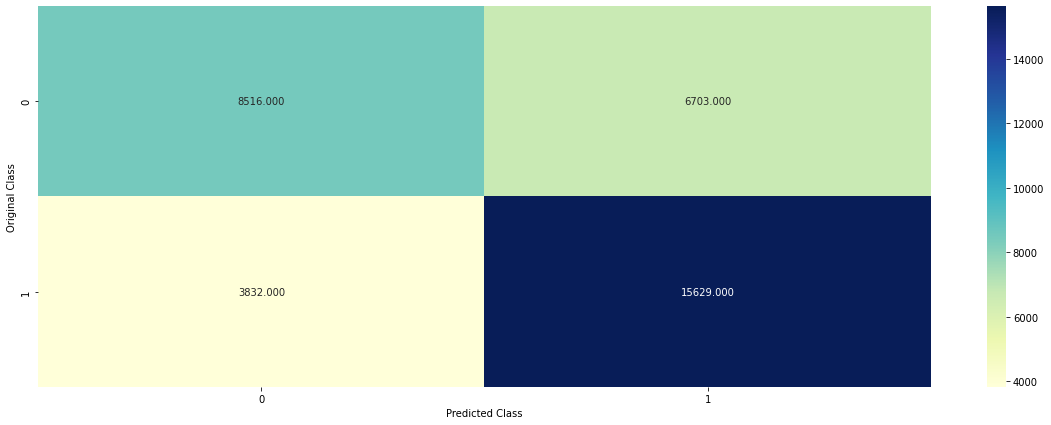

-------------------- Precision matrix (Columm Sum=1) --------------------


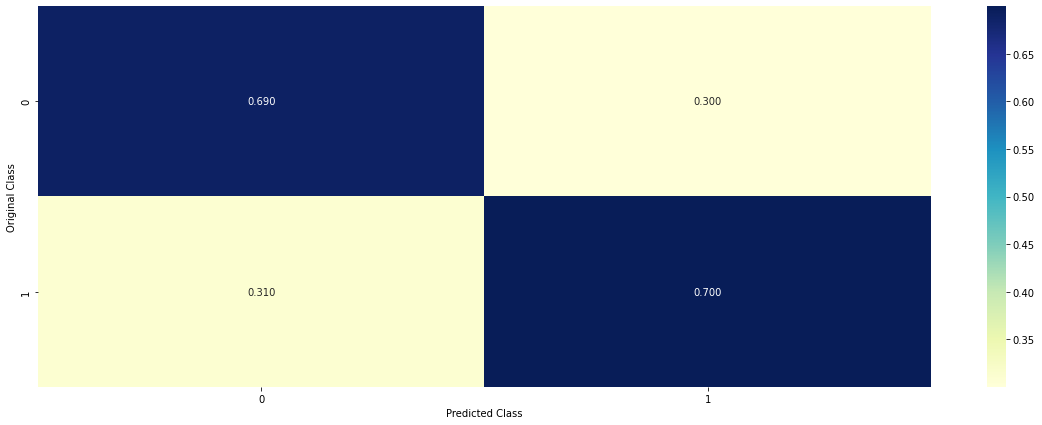

-------------------- Recall matrix (Row sum=1) --------------------


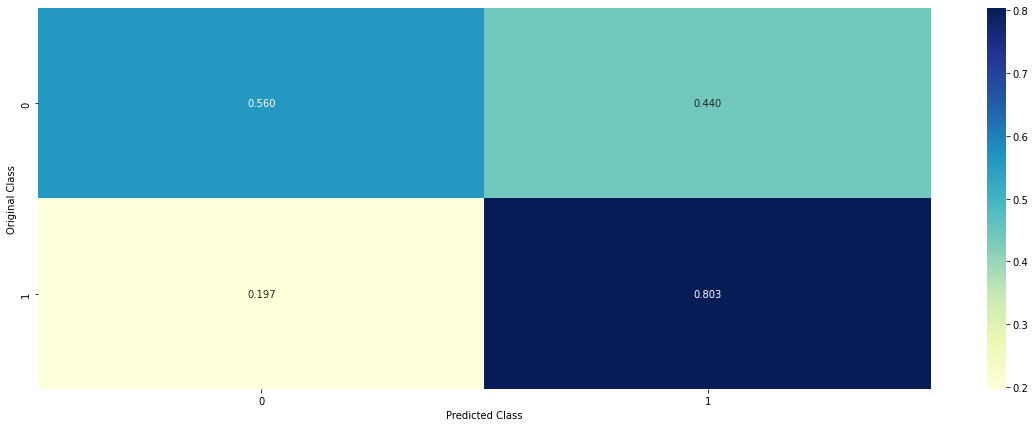

In [ ]:
plot_confusion_matrix_new(y_test, RFClassifier.predict(xtest_num))

In [ ]:
with open(r"/content/drive/MyDrive/RForest_class_balanced_0_1_NEW1.pickle", "wb") as output_file3:
  cPickle.dump(RFClassifier,output_file3)

In [ ]:
with open(r"/content/drive/MyDrive/RForest_CalibratedClassifier_class_balanced_0_1_NEW1.pickle", "wb") as output_file3:
  cPickle.dump(rf_clai,output_file3)

## XGBoost with class balanced and 0,1

In [ ]:
lr=[0.0001, 0.001, 0.01, 0.1, 1, 10]
mdepth=[2,3,4,5,6,7,8]
estimator=[5,10,50,100,200,250]
xgb=XGBClassifier()
parameter={'learning_rate':lr,'max_depth':mdepth,'n_estimators':estimator}
clf = RandomizedSearchCV(xgb, parameter, cv=StratifiedKFold(3), scoring='neg_log_loss',return_train_score=True)
clf.fit(X_resample, y_resampled)

RandomizedSearchCV(cv=StratifiedKFold(n_splits=3, random_state=None, shuffle=False),
                   error_score=nan,
                   estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                           colsample_bylevel=1,
                                           colsample_bynode=1,
                                           colsample_bytree=1, gamma=0,
                                           learning_rate=0.1, max_delta_step=0,
                                           max_depth=3, min_child_weight=1,
                                           missing=None, n_estimators=100,
                                           n_jobs=1, nthread=None,
                                           objective='b...
                                           reg_lambda=1, scale_pos_weight=1,
                                           seed=None, silent=None, subsample=1,
                                           verbosity=1),
                   iid='deprecat

In [ ]:
clf.best_params_

{'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 100}

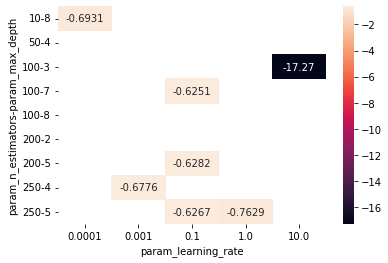

In [ ]:
import seaborn as sns
results_data = pd.DataFrame.from_dict(clf.cv_results_)
max_scores = results_data.groupby(['param_n_estimators', 'param_max_depth','param_learning_rate']).max()
max_scores = max_scores.unstack()[['mean_test_score', 'mean_train_score']]
sns.heatmap(max_scores.mean_test_score, annot=True, fmt='.4g');




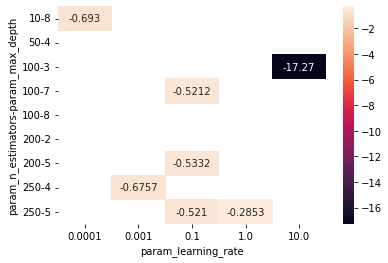

In [ ]:
sns.heatmap(max_scores.mean_train_score, annot=True, fmt='.4g');

In [ ]:
# #https://towardsdatascience.com/xgboost-mathematics-explained-58262530904a
xgb=XGBClassifier(class_weight='balanced',learning_rate=0.1,n_estimators=100,max_depth=7)
xgb.fit(X_resample, y_resampled)

xgb_clai=CalibratedClassifierCV(xgb,method='sigmoid')
xgb_clai.fit(X_resample, y_resampled)

y_train_predict_prob=xgb_clai.predict_proba(X_resample)
y_test_predict_prob=xgb_clai.predict_proba(xtest_num)

print('Train LOG LOSS is {0}'.format(log_loss(y_resampled,y_train_predict_prob)))
print('Test LOG LOSS is {0}'.format(log_loss(y_test,y_test_predict_prob)))


print('Train f1 score is {0}'.format(f1_score(y_resampled,xgb.predict(X_resample),average="macro")))
print('Test f1 score is {0}'.format(f1_score(y_test,xgb.predict(xtest_num),average="macro")))

Train LOG LOSS is 0.5273444462967612
Test LOG LOSS is 0.618307582121633
Train f1 score is 0.7258420944573345
Test f1 score is 0.6337073914609389


In [ ]:
with open(r"/content/drive/MyDrive/XGB1_class_balanced_0_1_NEW1.pickle", "wb") as output_file3:
  cPickle.dump(xgb,output_file3)

In [ ]:
with open(r"/content/drive/MyDrive/XGB1_CalibratedClassifier_class_balanced_0_1_NEW1.pickle", "wb") as output_file3:
  cPickle.dump(xgb_clai,output_file3)

-------------------- Confusion matrix --------------------


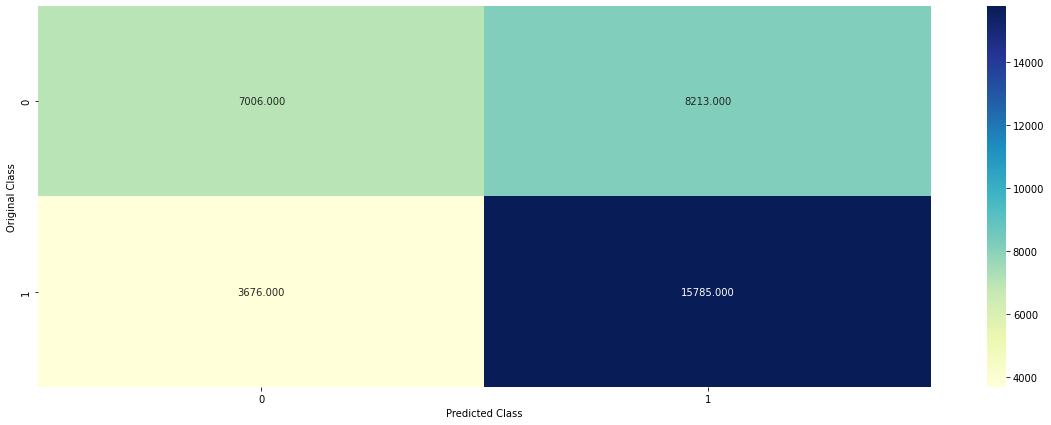

-------------------- Precision matrix (Columm Sum=1) --------------------


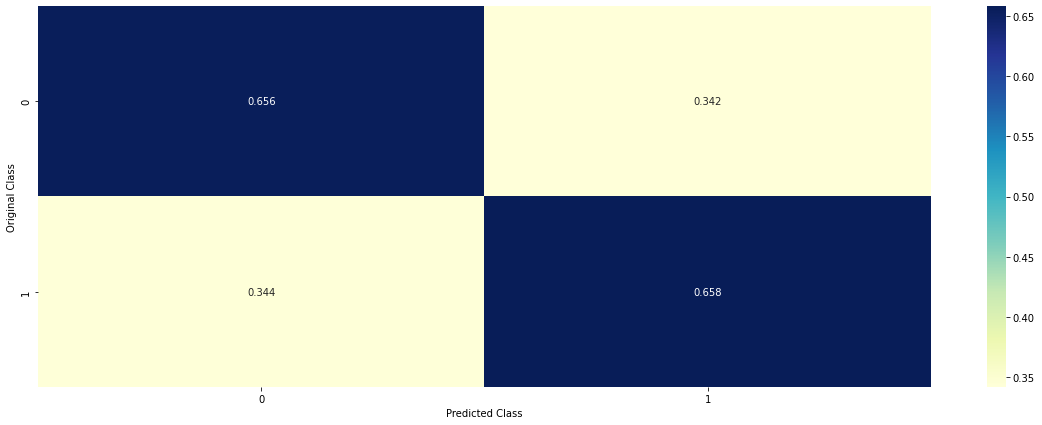

-------------------- Recall matrix (Row sum=1) --------------------


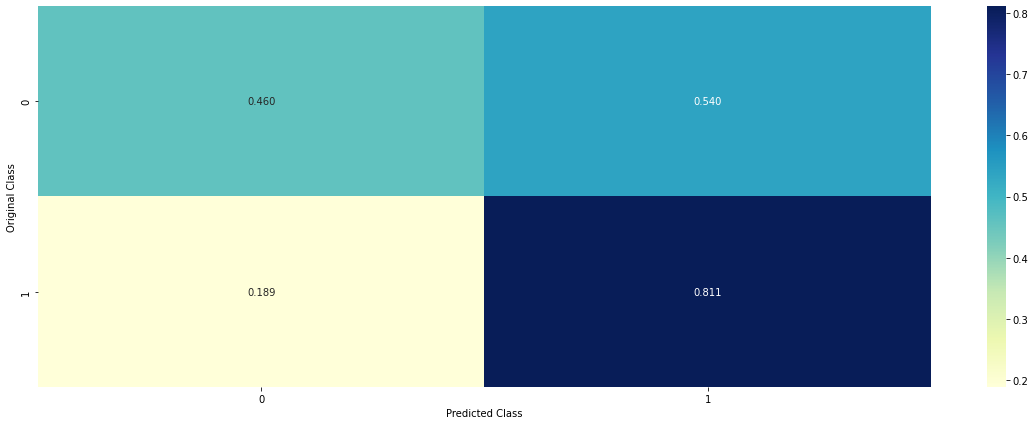

In [ ]:
plot_confusion_matrix_new(y_test, xgb.predict(xtest_num))

## Class balanced with 1,2,3,4,5 class 

In [ ]:
#https://stackoverflow.com/questions/65280842/smote-could-not-convert-string-to-float
oversample_smote = SMOTE()
X_resample, y_resampled = SMOTE().fit_resample(xtrain_num, y_train) 

In [ ]:
print("class distribution BEFORE SMOTE in train data: \n",y_train.value_counts())
print("class distribution AFTER SMOTE in train data: \n",pd.DataFrame ({'values': y_resampled }).value_counts())

class distribution BEFORE SMOTE in train data: 
 5    45406
4    15304
1    10489
3     6838
2     2880
Name: review_score, dtype: int64
class distribution AFTER SMOTE in train data: 
 values
5         45406
4         45406
3         45406
2         45406
1         45406
dtype: int64


In [ ]:

alpha = [10 ** x for x in range(-5, 2)]

neigh = SGDClassifier(loss='log', penalty='l2',n_jobs=-1)
parameters = {'alpha':alpha}

clf = RandomizedSearchCV(neigh, parameters, cv=StratifiedKFold(5), scoring='neg_log_loss',return_train_score=True)
clf.fit(X_resample, y_resampled)

RandomizedSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
                   error_score=nan,
                   estimator=SGDClassifier(alpha=0.0001, average=False,
                                           class_weight=None,
                                           early_stopping=False, epsilon=0.1,
                                           eta0=0.0, fit_intercept=True,
                                           l1_ratio=0.15,
                                           learning_rate='optimal', loss='log',
                                           max_iter=1000, n_iter_no_change=5,
                                           n_jobs=-1, penalty='l2', power_t=0.5,
                                           random_state=None, shuffle=True,
                                           tol=0.001, validation_fraction=0.1,
                                           verbose=0, warm_start=False),
                   iid='deprecated', n_iter=10, n_jobs=None,
        

In [ ]:
clf.best_params_

{'alpha': 0.01}

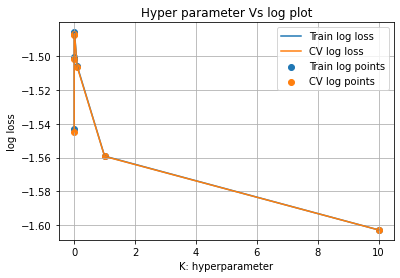

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,18.505002,0.499201,0.047436,0.002394,1e-05,{'alpha': 1e-05},-1.554782,-1.541410,-1.541826,-1.536525,-1.549404,-1.544789,0.006475,5,-1.537802,-1.538598,-1.544202,-1.540139,-1.555694,-1.543287,0.006584
1,6.092484,0.193125,0.048608,0.004560,0.0001,{'alpha': 0.0001},-1.509671,-1.502644,-1.502964,-1.496381,-1.495403,-1.501413,0.005168,3,-1.496381,-1.499511,-1.505685,-1.500023,-1.500937,-1.500507,0.003008
2,3.208872,0.038596,0.047128,0.001795,0.001,{'alpha': 0.001},-1.496951,-1.487953,-1.486072,-1.485441,-1.482259,-1.487735,0.004960,2,-1.484530,-1.485930,-1.487736,-1.487018,-1.487329,-1.486509,0.001157
3,2.485833,0.003106,0.048187,0.004003,0.01,{'alpha': 0.01},-1.493362,-1.487634,-1.485118,-1.484780,-1.483032,-1.486785,0.003602,1,-1.483553,-1.485563,-1.486615,-1.486360,-1.487285,-1.485875,0.001286
4,2.523235,0.048887,0.045648,0.001659,0.1,{'alpha': 0.1},-1.508435,-1.506888,-1.506432,-1.505448,-1.504504,-1.506341,0.001331,4,-1.504703,-1.505593,-1.505958,-1.506297,-1.506684,-1.505847,0.000676


In [ ]:
results = pd.DataFrame.from_dict(clf.cv_results_)
results = results.sort_values(['param_alpha'])

train_log_los= results['mean_train_score']
train_log_std= results['std_train_score']
cv_log_los = results['mean_test_score'] 
cv_log_std= results['std_test_score']
K =  results['param_alpha']

plt.plot(K, train_log_los, label='Train log loss')
# this code is copied from here: https://stackoverflow.com/a/48803361/4084039
# plt.gca().fill_between(K, train_auc - train_auc_std,train_auc + train_auc_std,alpha=0.2,color='darkblue')

plt.plot(K, cv_log_los, label='CV log loss')
# this code is copied from here: https://stackoverflow.com/a/48803361/4084039
# plt.gca().fill_between(K, cv_auc - cv_auc_std,cv_auc + cv_auc_std,alpha=0.2,color='darkorange')

plt.scatter(K, train_log_los, label='Train log points')
plt.scatter(K, cv_log_los, label='CV log points')


plt.legend()
plt.xlabel("K: hyperparameter")
plt.ylabel("log loss")
plt.title("Hyper parameter Vs log plot")
plt.grid()
plt.show()

results.head()

In [ ]:
clf = SGDClassifier(alpha=0.01, penalty='l2', loss='log', random_state=42)
clf.fit(X_resample, y_resampled)

sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(X_resample, y_resampled)


predict_y = sig_clf.predict_proba(X_resample)
print('For values of best alpha = ', 0.01, "The train log loss is:",log_loss(y_resampled, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(xtest_num)

print('For values of best alpha = ', 0.01, "The test log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))
predicted_y =np.argmax(predict_y,axis=1)

print('F1 score for train data',f1_score(y_resampled,clf.predict(X_resample),average="macro"))

print('F1 score for test data',f1_score(y_test,clf.predict(xtest_num),average="macro"))


print("Total number of data points :", len(predicted_y))


For values of best alpha =  0.01 The train log loss is: 1.4843960059721761
For values of best alpha =  0.01 The test log loss is: 1.508801893570918
F1 score for train data 0.3249306789486147
F1 score for test data 0.2693968737378758
Total number of data points : 34680


In [ ]:
with open(r"/content/drive/MyDrive/clf_class_balanced_12345_NEW1.pickle", "wb") as output_file3:
  cPickle.dump(clf,output_file3)

with open(r"/content/drive/MyDrive/clf_class_balanced_12345_caliberated_NEW1.pickle", "wb") as output_file3:
  cPickle.dump(sig_clf,output_file3)  

-------------------- Confusion matrix --------------------


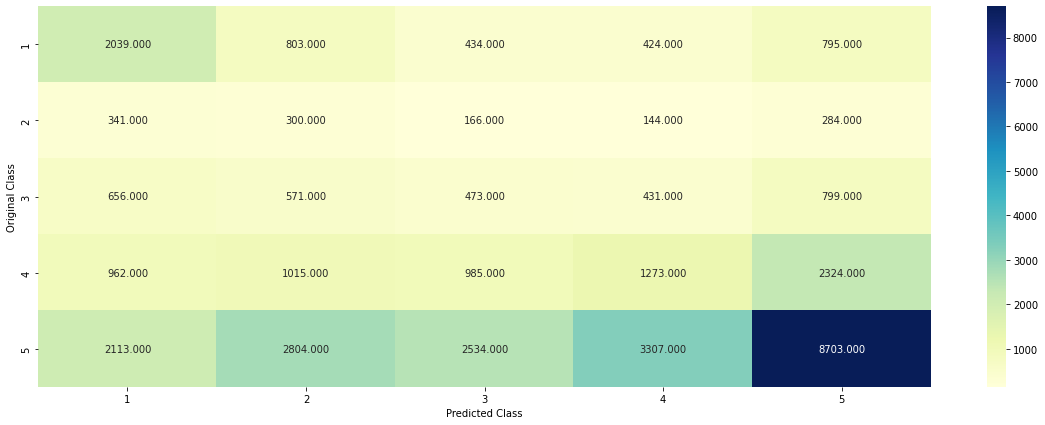

-------------------- Precision matrix (Columm Sum=1) --------------------


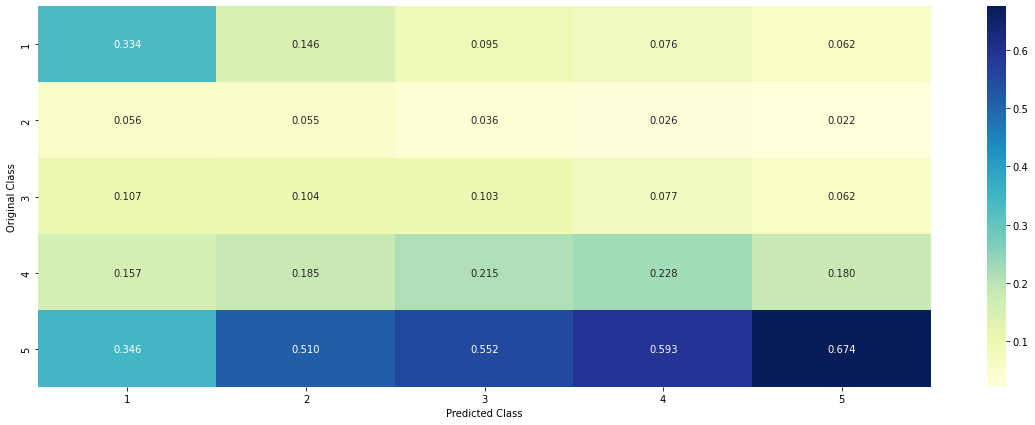

-------------------- Recall matrix (Row sum=1) --------------------


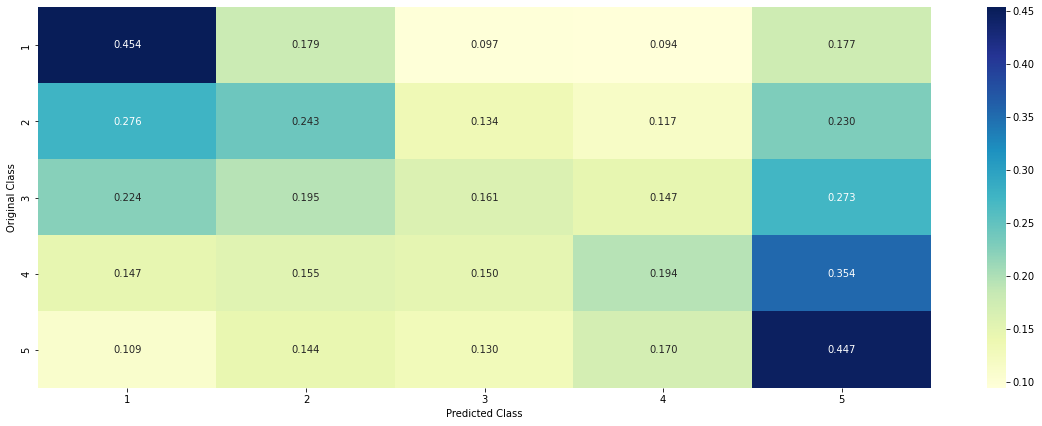

In [ ]:
plot_confusion_matrix(y_test, clf.predict(xtest_num))

## Deep Learning Model

In [ ]:
xtrain_num.shape
def changeLearningRate(epoch,lr):
  if epoch %3==0:
    lr*=0.5
  return lr 

In [ ]:
X_train.shape

(56641, 60, 1)

In [ ]:
X_train, X_cv, y_train, y_cv = train_test_split(X_train, y_train, test_size=0.30, random_state=10, stratify=y_train)

In [ ]:
print(X_train.shape)
print(X_cv.shape)

(39648, 60, 1)
(16993, 60, 1)


In [ ]:
X_train=np.resize(X_train,new_shape=(X_train.shape[0], X_train.shape[1], 1))

In [ ]:
X_cv=np.resize(X_cv,new_shape=(X_cv.shape[0], X_cv.shape[1], 1))

In [ ]:
X_train.shape
from keras.utils.np_utils import to_categorical
y_train_n = tf.keras.utils.to_categorical(y_train)
y_cv_n = tf.keras.utils.to_categorical(y_cv)
y_test_n = tf.keras.utils.to_categorical(y_test)

In [ ]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(y_train)
y_train_encode=le.transform(y_train)
y_test_cv=le.transform(y_cv)
y_test_encode=le.transform(y_test)

In [ ]:
from keras.utils.np_utils import to_categorical

#https://stackoverflow.com/questions/44110426/when-to-use-to-categorical-in-keras
y_train_Vactor = tf.keras.utils.to_categorical(y_train_encode)
y_cv_Vactor = tf.keras.utils.to_categorical(y_test_cv)
y_test_Vactor = tf.keras.utils.to_categorical(y_test_encode)
print("Shape of y_train_new :", y_train_Vactor.shape)
print("Shape of y_train_new :", y_cv_Vactor.shape)
print("Shape of y_test_new  :", y_test_Vactor.shape)

Shape of y_train_new : (56641, 5)
Shape of y_train_new : (24276, 5)
Shape of y_test_new  : (34680, 5)


In [ ]:
input_num=Input(shape=(60,))
# Conv1D_filter_size_M = Conv1D(filters=20,kernel_size=3,strides=1,padding="same",data_format="channels_last",dilation_rate=1,groups=1,activation="relu",kernel_initializer=tf.keras.initializers.HeUniform(seed=30),kernel_regularizer=l2(0.00001),name="Conv1D_filter_size_M")(input_num)
# Batchnorm1 = BatchNormalization()(Conv1D_filter_size_M)
# MaxPoolLayer_1 = MaxPool1D(pool_size=1, strides=1, padding='same', data_format='channels_last', name="MaxPoolLayer_1")(Batchnorm1)
# Flatten1 = Flatten(data_format='channels_last',name='flatten')(MaxPoolLayer_1)


Dense1 = Dense(200,activation='relu',kernel_initializer=tf.keras.initializers.HeUniform(seed=30),kernel_regularizer=l2(0.001))(input_num)
DropOut1 = Dropout(0.35)(Dense1)

Dense2 = Dense(200,activation='relu',kernel_initializer=tf.keras.initializers.HeUniform(seed=30),kernel_regularizer=l2(0.001))(DropOut1)
DropOut2 = Dropout(0.35)(Dense2)

Dense3 = Dense(200,activation='relu',kernel_initializer=tf.keras.initializers.HeUniform(seed=30),kernel_regularizer=l2(0.001))(DropOut2)
output = Dense(5, activation = 'softmax')(Dense3)



Model3=Model(inputs=input_num,outputs=output)
Model3.run_eagerly = True


filewriter=tf.summary.create_file_writer('/content/drive/MyDrive/DeepLearning')

tenserboard=TensorBoard(log_dir='/content/drive/MyDrive/DeepLearning',histogram_freq=1)

filepath="/content/drive/MyDrive/DeepLearning/ModelNo3-{epoch:02d}-{val_acc:.4f}.hdf5"

checkpoint=ModelCheckpoint(filepath,monitor='val_acc',verbose=1,save_best_only=True,mode='max')


EarlyStop=EarlyStopping(monitor='val_acc',patience=2, verbose=1)

Lrcheudal=LearningRateScheduler(changeLearningRate)


x_cv_list=X_cv
#CalbackList=[CallbackFunction([x_cv_essay_pad,x_cv_school_pad,x_cv_grade_pad,x_cv_clean_pad,x_cv_cleanSub_pad,x_cv_techer_pad,x_cv['Remain_input']],filewriter),EarlyStop,checkpoint,Lrcheudal]

#CalbackList=[CallbackFunction(x_cv_list,filewriter),EarlyStop,checkpoint,Lrcheudal,tenserboard]
#CallBakList=[CallbackFunction(([x_cv_essay_pad,x_cv_school_pad,x_cv_grade_pad,x_cv_clean_pad,x_cv_cleanSub_pad,x_cv_techer_pad,x_cv['Remain_input']],y_cv_Vactor),filewriter),EarlyStop,checkpoint,Lrcheudal,tenserboard]


CalbackList=[EarlyStop,checkpoint,Lrcheudal,tenserboard]

optimizer=tf.keras.optimizers.Adam(0.01)
los=tf.keras.losses.categorical_crossentropy

#CreateModel.compile(loss=los, optimizer=optimizer,metrics="accuracy")

Model3.compile(loss='categorical_crossentropy', optimizer=tf.keras.optimizers.Adam(lr=0.0006,decay = 1e-4),metrics=['acc'])


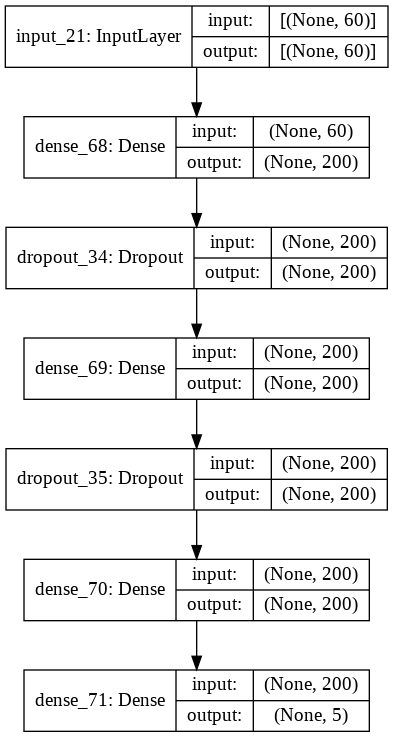

In [ ]:
from keras.utils.vis_utils import plot_model
plot_model(Model3, to_file='/content/drive/MyDrive/model_3.png', show_shapes=True, show_layer_names=True)

In [ ]:
Model3.fit(X_train, y_train_Vactor, epochs=50, verbose=1, batch_size=256, validation_data=(X_cv , y_cv_Vactor),callbacks=CalbackList)

Epoch 1/50
222/222 [==============================] - 41s 183ms/step - loss: 2.6424 - acc: 0.4946 - val_loss: 2.3061 - val_acc: 0.5772

Epoch 00001: val_acc improved from -inf to 0.57724, saving model to /content/drive/MyDrive/DeepLearning/ModelNo3-01-0.5772.hdf5
Epoch 2/50
222/222 [==============================] - 1s 6ms/step - loss: 2.3171 - acc: 0.5592 - val_loss: 2.2081 - val_acc: 0.5814

Epoch 00002: val_acc improved from 0.57724 to 0.58136, saving model to /content/drive/MyDrive/DeepLearning/ModelNo3-02-0.5814.hdf5
Epoch 3/50
222/222 [==============================] - 1s 6ms/step - loss: 2.1897 - acc: 0.5723 - val_loss: 2.1111 - val_acc: 0.5842

Epoch 00003: val_acc improved from 0.58136 to 0.58424, saving model to /content/drive/MyDrive/DeepLearning/ModelNo3-03-0.5842.hdf5
Epoch 4/50
222/222 [==============================] - 1s 6ms/step - loss: 2.1049 - acc: 0.5772 - val_loss: 2.0598 - val_acc: 0.5857

Epoch 00004: val_acc improved from 0.58424 to 0.58568, saving model to /con

## Random Model

In [ ]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(80917, 60)
(34680, 60)
(80917,)
(34680,)


In [ ]:
#sum(sum(rand_probs))
((rand_probs/sum(sum(rand_probs)))[0])

array([0.41155388, 0.58844612])

In [ ]:
#with out class balanced
predicted_y_hold=np.zeros((len(y_test),5))
for i in range(len(y_test)):
  predicted_y_random=np.random.rand(1,5)
  predicted_y_hold[i]=((predicted_y_random/sum(sum(predicted_y_random)))[0])
print("Log loss on Test Data using Random Model",log_loss(y_test, predicted_y_hold, eps=1e-15)) 


Log loss on Test Data using Random Model 1.8897998369549254


In [ ]:
#with class balanced
y_test_random=y_test.apply(lambda review_score: 0 if review_score<5 else 1)

In [ ]:
predicted_y_hold=np.zeros((len(y_test),2))
for i in range(len(y_test)):
  predicted_y_random=np.random.rand(1,2)
  predicted_y_hold[i]=((predicted_y_random/sum(sum(predicted_y_random)))[0])
print("Log loss on Test Data using Random Model",log_loss(y_test_random, predicted_y_hold, eps=1e-15)) 

Log loss on Test Data using Random Model 0.8871196607582769
